# `Стажер: аналитик данных Пушкин А.Е.`
### Trainee: data analyst Pushkin A.

# `Период стажировки: 07.12.2022 - 20.12.2022`
### Traineeship period: 07.12.2022 - 20.12.2022

# `Задание на стажировку по анализу данных`
### Traineeship task

Вы проходите стажировку в университете S. S занимает значимое место в экономике региона (г. Санкт-Петербург) и готовит специалистов для строительной отрасли.

Для того, чтобы правильно выстроить стратегию работы с абитуриентами и стать настоящим полюсом притяжения талантов, университет просит Вас проанализировать данные приемной кампании 2022 года.

У Вас есть файл в формате xls, который содержит следующие столбцы:
* __Уникальный код__ – id абитуриента	
* **Дата подачи заявления**
* **Сумма баллов** – за ЕГЭ и собственные вступительные испытания (абитуриенты, поступающие на архитектурный факультет сдают 4 экзамена)
* **Сумма баллов за инд.дост.(конкурсные)** – дополнительные баллы для поступления
* **Пол**
* **Дата рождения**	
* **Гражданство**
* **Основание поступления** – бюджет, контракт или целевое обучение (т.е. обучение за счет средств будущего работодателя)
* **Категория приема** – имеют ли льготы при поступлении
* **Форма обучения** – очная, очно-заочная (вечерняя), заочная	
* **Уровень подготовки** – бакалавриат или специалитет	
* **Направление\специальность** - из направлений, реализуемых в университете
* **Факультет** 	
* **Регион по прописке**	
* **Вид образования** – что окончил абитуриент - среднее (школа) или среднее специальное (колледж)
* **Год завершения** – год завершения образования предыдущей ступени	
* **Состояние** – зачислен ли абитуриент	
* **Доставка документов**	- способ подачи документов, где веб – личный кабинет на сайте университета
* **Дата согласия на зачисление** – дата, когда абитуриент дал согласие на зачисление, может быть до публикации конкурсных списков (публикуются 27 июля) или в обозначенные сроки после публикации (с 27 июля по 3 августа). Если абитуриент подал согласие до публикации конкурсных списков, значит вуз для него в приоритете, если после, то рассматривал и другие варианты поступления.


В тетрадке Jupiter notebook / Collab с помощью библиотек python проведите анализ имеющихся данных только для абитуриентов, которые подавали заявление на **`очную`** форму обучения, по направлениям:

1. Общая информация о приемной кампании
2. Портрет абитуриента

# Часть 0 - Разгрузка данных, анализ чистоты данных, очистка данных
### Chapter 0 - Data reading, analysis of data purity, data cleaning

### Импорт библиотек, подготовка ссылки, чтение данных из файла
#### Import libraries, link preparation, reading data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

print(pd.__version__)
print(np.__version__)

import warnings
warnings.filterwarnings('ignore')

1.4.2
1.21.5


In [2]:
link = 'admission_декабрь.xls'
raw_data = pd.read_excel(link)
raw_data

,Уникальный код,Дата подачи заявления,Сумма баллов,Сумма баллов за инд.дост.(конкурсные),Пол,Дата рождения,Гражданство,Основание поступления,Категория приема,Форма обучения,Уровень подготовки,Направление\специальность,Факультет,Регион по прописке,Вид образования,Год завершения,Состояние,Доставка документов,Дата согласия на зачисление
0,702-875 69,30.07.2022,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.04 Градостроительство,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaN
1,702-875 69,30.07.2022,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaN
2,702-875 69,30.07.2022,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.01 Архитектура,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Зачислен,"Суперсервис ""Поступление в вуз онлайн""",30.07.2022 11:41:43
3,702-875 69,30.07.2022,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaN
4,530-013 41,04.07.2022,301,0,Женский,22.10.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Санкт-Петербург г,Среднее общее,2022,Подано,Лично,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29465,149-613 49,22.07.2022,0,0,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,08.03.01 Строительство,строительный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaN
29466,149-613 49,22.07.2022,0,0,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,15.03.03 Прикладная механика,автомобильно-дорожный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaN
29467,149-613 49,22.07.2022,0,0,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,01.03.02 Прикладная математика и информатика,строительный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaN
29468,149-613 49,22.07.2022,0,0,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,23.03.01 Технология транспортных процессов,автомобильно-дорожный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaN


Согласно задаче. нужно проанализировать только пул абитуриентов, подававших заявление на `очную` форму обучения. В связи с этим из датасета будут удалены все остальные формы обучения, кроме `очной`

Проверка уникальных значений в признаке `'Форма обучения'`

In [3]:
raw_data['Форма обучения'].unique()

array(['очная', 'очно-заочная', 'заочная'], dtype=object)

В признаке `'Форма обучения'` всего три уникальных значения, в итоге далее остается только значение `'очная'`

In [4]:
data = raw_data[raw_data['Форма обучения'] == 'очная']
data

,Уникальный код,Дата подачи заявления,Сумма баллов,Сумма баллов за инд.дост.(конкурсные),Пол,Дата рождения,Гражданство,Основание поступления,Категория приема,Форма обучения,Уровень подготовки,Направление\специальность,Факультет,Регион по прописке,Вид образования,Год завершения,Состояние,Доставка документов,Дата согласия на зачисление
0,702-875 69,30.07.2022,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.04 Градостроительство,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaN
1,702-875 69,30.07.2022,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaN
2,702-875 69,30.07.2022,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.01 Архитектура,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Зачислен,"Суперсервис ""Поступление в вуз онлайн""",30.07.2022 11:41:43
3,702-875 69,30.07.2022,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaN
4,530-013 41,04.07.2022,301,0,Женский,22.10.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Санкт-Петербург г,Среднее общее,2022,Подано,Лично,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29465,149-613 49,22.07.2022,0,0,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,08.03.01 Строительство,строительный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaN
29466,149-613 49,22.07.2022,0,0,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,15.03.03 Прикладная механика,автомобильно-дорожный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaN
29467,149-613 49,22.07.2022,0,0,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,01.03.02 Прикладная математика и информатика,строительный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaN
29468,149-613 49,22.07.2022,0,0,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,23.03.01 Технология транспортных процессов,автомобильно-дорожный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaN


In [5]:
nou = raw_data['Форма обучения'].count() - data['Форма обучения'].count() #number_of_units
print('{} значений(е/я) было удалено по формам обучения очно-заочная и заочная'.format(nou))

1460 значений(е/я) было удалено по формам обучения очно-заочная и заочная


### Оценка количества записей, признаков, их типов, наличия нулевых значений
#### Data inspection: shape, data types, amount of null values

Оценка количества записей, признаков, их типов, наличия нулевых значений в новом датасете

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28010 entries, 0 to 29469
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Уникальный код                         28010 non-null  object
 1   Дата подачи заявления                  28010 non-null  object
 2   Сумма баллов                           28010 non-null  int64 
 3   Сумма баллов за инд.дост.(конкурсные)  28010 non-null  int64 
 4   Пол                                    28010 non-null  object
 5   Дата рождения                          28010 non-null  object
 6   Гражданство                            27993 non-null  object
 7   Основание поступления                  28010 non-null  object
 8   Категория приема                       28010 non-null  object
 9   Форма обучения                         28010 non-null  object
 10  Уровень подготовки                     28010 non-null  object
 11  Направление\спе

В датасете 19 признаков, 3 из которых содержат нулевые значения. В датасете 28 010 записей

Для удобства дальнейшей работы названия признаков будут изменены

In [7]:
# изначальные наименования признаков
old_cols_names = data.columns
old_cols_names

Index(['Уникальный код', 'Дата подачи заявления', 'Сумма баллов',
       'Сумма баллов за инд.дост.(конкурсные)', 'Пол', 'Дата рождения',
       'Гражданство', 'Основание поступления', 'Категория приема',
       'Форма обучения', 'Уровень подготовки', 'Направление\специальность',
       'Факультет', 'Регион по прописке', 'Вид образования', 'Год завершения',
       'Состояние', 'Доставка документов', 'Дата согласия на зачисление'],
      dtype='object')

In [8]:
new_cols_names = [
    'applicant_id',
    'date_of_application',
    'score',
    'score_add',
    'sex',
    'date_of_birth',
    'citizenship',
    'basis',
    'social_category',
    'edu_form',
    'grade',
    'speciality',
    'faculty',
    'home_region',    
    'base_edu',
    'year_of_base_grad',
    'status_of_application',
    'method_docs_delivery',
    'date_of_agreement'
]

In [9]:
data = data.rename(columns=dict(zip(old_cols_names, new_cols_names)))
data.head()

,applicant_id,date_of_application,score,score_add,sex,date_of_birth,citizenship,basis,social_category,edu_form,grade,speciality,faculty,home_region,base_edu,year_of_base_grad,status_of_application,method_docs_delivery,date_of_agreement
0,702-875 69,30.07.2022,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.04 Градостроительство,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaN
1,702-875 69,30.07.2022,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaN
2,702-875 69,30.07.2022,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.01 Архитектура,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Зачислен,"Суперсервис ""Поступление в вуз онлайн""",30.07.2022 11:41:43
3,702-875 69,30.07.2022,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaN
4,530-013 41,04.07.2022,301,0,Женский,22.10.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Санкт-Петербург г,Среднее общее,2022,Подано,Лично,NaN


Переименование признаков прошло успешно

Тип признаков, содержащих даты, необходимо конвертировать в тип даты

In [10]:
for col in ['date_of_application', 'date_of_birth', 'date_of_agreement']:
    data[col]= pd.to_datetime(data[col])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28010 entries, 0 to 29469
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   applicant_id           28010 non-null  object        
 1   date_of_application    28010 non-null  datetime64[ns]
 2   score                  28010 non-null  int64         
 3   score_add              28010 non-null  int64         
 4   sex                    28010 non-null  object        
 5   date_of_birth          28010 non-null  datetime64[ns]
 6   citizenship            27993 non-null  object        
 7   basis                  28010 non-null  object        
 8   social_category        28010 non-null  object        
 9   edu_form               28010 non-null  object        
 10  grade                  28010 non-null  object        
 11  speciality             28010 non-null  object        
 12  faculty                28010 non-null  object        
 13  h

In [12]:
data.head()

,applicant_id,date_of_application,score,score_add,sex,date_of_birth,citizenship,basis,social_category,edu_form,grade,speciality,faculty,home_region,base_edu,year_of_base_grad,status_of_application,method_docs_delivery,date_of_agreement
0,702-875 69,2022-07-30,323,0,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.04 Градостроительство,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT
1,702-875 69,2022-07-30,323,0,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT
2,702-875 69,2022-07-30,323,0,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.01 Архитектура,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Зачислен,"Суперсервис ""Поступление в вуз онлайн""",2022-07-30 11:41:43
3,702-875 69,2022-07-30,323,0,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT
4,530-013 41,2022-04-07,301,0,Женский,2004-10-22,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Санкт-Петербург г,Среднее общее,2022,Подано,Лично,NaT


Признаки, содержащие даты, преобразованы в тип даты

Поиск дубликатов

In [13]:
print('Обнаружено {} полных дубликатов, которые будут удалены'.format(data.duplicated().sum()))

Обнаружено 35 полных дубликатов, которые будут удалены


In [14]:
duplicated_data = data[data.duplicated()]

In [15]:
duplicated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 10753 to 28549
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   applicant_id           35 non-null     object        
 1   date_of_application    35 non-null     datetime64[ns]
 2   score                  35 non-null     int64         
 3   score_add              35 non-null     int64         
 4   sex                    35 non-null     object        
 5   date_of_birth          35 non-null     datetime64[ns]
 6   citizenship            35 non-null     object        
 7   basis                  35 non-null     object        
 8   social_category        35 non-null     object        
 9   edu_form               35 non-null     object        
 10  grade                  35 non-null     object        
 11  speciality             35 non-null     object        
 12  faculty                35 non-null     object        
 13  

In [16]:
duplicated_data.method_docs_delivery.unique()

array(['Суперсервис "Поступление в вуз онлайн"'], dtype=object)

<div class="alert alert-block alert-success">
<b>Все дубликаты сформированы сервисом 'Суперсервис "Поступление в вуз онлайн"'</b>
</div>

Удаление полных дубликатов

In [17]:
data.drop_duplicates(inplace= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27975 entries, 0 to 29469
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   applicant_id           27975 non-null  object        
 1   date_of_application    27975 non-null  datetime64[ns]
 2   score                  27975 non-null  int64         
 3   score_add              27975 non-null  int64         
 4   sex                    27975 non-null  object        
 5   date_of_birth          27975 non-null  datetime64[ns]
 6   citizenship            27958 non-null  object        
 7   basis                  27975 non-null  object        
 8   social_category        27975 non-null  object        
 9   edu_form               27975 non-null  object        
 10  grade                  27975 non-null  object        
 11  speciality             27975 non-null  object        
 12  faculty                27975 non-null  object        
 13  h

Анализ уникальных значений категориальных признаков

In [18]:
raw_list_data = []
for col in data.columns:
    if data[col].dtype == 'object':
        raw_list_data.append([f'{col}, уник. значений: {data[col].nunique()}', data[col].unique()])
        raw_list_data.append('----------')
raw_list_data

[['applicant_id, уник. значений: 5334',
  array(['702-875 69', '530-013 41', '853-207 15', ..., '02250',
         '932-664 04', '149-613 49'], dtype=object)],
 '----------',
 ['sex, уник. значений: 2', array(['Женский', 'Мужской'], dtype=object)],
 '----------',
 ['citizenship, уник. значений: 23',
  array(['РОССИЯ', 'БЕЛАРУСЬ', 'КАЗАХСТАН', 'АРМЕНИЯ', 'ТУРКМЕНИЯ',
         'УЗБЕКИСТАН', 'УКРАИНА', nan, 'АЗЕРБАЙДЖАН', 'ЙЕМЕН', 'КИТАЙ',
         'ТУРЦИЯ', 'ИРАК', 'МАРОККО', 'ЛАТВИЯ', 'ТАДЖИКИСТАН', 'РУАНДА',
         'АЛЖИР', 'ГРУЗИЯ', 'КИРГИЗИЯ', 'Туркменистан',
         'ИРАН, ИСЛАМСКАЯ РЕСПУБЛИКА', 'АФГАНИСТАН', 'САУДОВСКАЯ АРАВИЯ'],
        dtype=object)],
 '----------',
 ['basis, уник. значений: 3',
  array(['бюджетная основа', 'целевой прием', 'полное возмещение затрат'],
        dtype=object)],
 '----------',
 ['social_category, уник. значений: 2',
  array(['Имеющие особое право', 'На общих основаниях'], dtype=object)],
 '----------',
 ['edu_form, уник. значений: 1', array(['очна

#### Признаки `citizenship` и `home_region` требуют очистки - есть повторяющиеся по смыслу значения, которые нужно привести к единообразию

#### Properties `citizenship` и `home_region` have to be cleaned - there are duplicated names written in different way

In [19]:
data['home_region'].unique()

array(['Татарстан Респ', 'Санкт-Петербург г',
       'Ханты-Мансийский Автономный округ - Югра АО', 'Мордовия Респ',
       'Крым Респ', 'Костромская обл', 'Хабаровский край',
       'Кабардино-Балкарская Респ', 'Саратовская обл', 'Смоленская обл',
       'Пермский край', 'Калининградская обл', 'Новгородская обл',
       'Саха /Якутия/ Респ', 'Ульяновская обл', 'Москва г',
       'Московская обл', 'Томская', 'Красноярский край', 'Хакасия Респ',
       'Коми Респ', 'Краснодарский край', 'Новосибирская обл',
       'Алтайский край', 'Самарская обл', 'Нижегородская обл',
       'Вологодская обл', 'Псковская обл', 'Ставропольский край',
       'Тульская обл', 'Белгородская обл', 'Архангельская обл',
       'Ленинградская обл', 'Ростовская обл', 'Бурятия Респ',
       'Сахалинская обл', 'Тамбовская обл', 'Иркутская обл',
       'Северная Осетия - Алания Респ', 'Удмуртская Респ', 'Алтай респ',
       'Тверская обл', 'Алтай Респ', 'Ярославская обл', 'Байконур г',
       'Калужская обл', 'Тыва

In [20]:
tat = {'Татарстан Респ': 'Татарстан Респ',
       'Татарстан респ': 'Татарстан Респ',
       'Татарстан республика': 'Татарстан Респ'
      }

In [21]:
piter = {'Санкт-Петербург г': 'Санкт-Петербург',
         'г. Санкт-Петербург': 'Санкт-Петербург',
         'город Санкт-Петербург': 'Санкт-Петербург',
         'Санкт-Петербург': 'Санкт-Петербург',
         'санкт-петербург': 'Санкт-Петербург'
        }

In [22]:
khan = {'Ханты-Мансийский Автономный округ - Югра АО': 'Ханты-Мансийский АО - Югра АО',
        'Ханты-Мансийский Автономный округ - Югра ао': 'Ханты-Мансийский АО - Югра АО'
       }

In [23]:
krym = {'Крым Респ': 'Крым Респ',
        'Крым респ': 'Крым Респ',
        'Крым Республика': 'Крым Респ'
       }

In [24]:
sara = {'Саратовская обл': 'Саратовская обл',
        'Саратовская': 'Саратовская обл'
       }

In [25]:
perm = {'Пермский край': 'Пермский край',
        'край Пермский': 'Пермский край'
       }

In [26]:
sakh = {'Саха /Якутия/ Респ': 'Саха /Якутия Респ',
       'Респ Саха /Якутия/': 'Саха /Якутия Респ'
       }

In [27]:
mosk = {'Московская обл': 'Московская обл',
       'Московская область': 'Московская обл'
       }

In [28]:
toms = {'Томская': 'Томская обл',
       'Томская обл': 'Томская обл'
       }

In [29]:
kras = {'Краснодарский край': 'Краснодарский край',
       'Краснодарский': 'Краснодарский край'
       }

In [30]:
alta = {'Алтай респ': 'Алтай Респ',
       'Алтай Респ': 'Алтай Респ'
       }

In [31]:
nizh = {'Нижегородская обл': 'Нижегородская обл',
       'Нижегородская область': 'Нижегородская обл'
       }

In [32]:
volo = {'Вологодская обл': 'Вологодская обл',
       'Вологодская область': 'Вологодская обл'
       }

In [33]:
stav = {'Ставропольский край': 'Ставропольский край',
       'Ставропольский': 'Ставропольский край'
       }

In [34]:
belg = {'Белгородская обл': 'Белгородская обл',
       'Белгородская': 'Белгородская обл'
       }

In [35]:
leni = {'Ленинградская обл': 'Ленинградская обл',
        'Ленинградская': 'Ленинградская обл'
       }

In [36]:
bury = {'Бурятия Респ': 'Бурятия Респ',
        'Бурятия респ': 'Бурятия Респ'
       }

In [37]:
kare = {'Карелия Респ': 'Карелия Респ',
       'Карелия респ': 'Карелия Респ'
       }

In [38]:
adyg = {'Адыгея Респ': 'Адыгея Респ',
       'Адыгея респ': 'Адыгея Респ'}

In [39]:
dage = {'Дагестан Респ': 'Дагестан Респ',
       'Республика Дагестан': 'Дагестан Респ',
       'Дагестан респ': 'Дагестан Респ'
       }

In [40]:
ymal = {'Ямало-Ненецкий ао': 'Ямало-Ненецкий АО',
       'Ямало-Ненецкий АО': 'Ямало-Ненецкий АО'
       }

In [41]:
keme = {'Кемеровская область - Кузбасс': 'Кемеровская область - Кузбасс',
       'Кемеровская област': 'Кемеровская область - Кузбасс',
       'Кемеровская область - Кузбасс обл': 'Кемеровская область - Кузбасс',
       'Кемеровская область': 'Кемеровская область - Кузбасс'
       }

In [42]:
noth = {'-': None}

In [43]:
list_of_changedicts = [tat, piter, khan, krym, sara,
                       perm, sakh, mosk, toms, kras,
                       alta, nizh, volo, stav, belg,
                       leni, bury, kare, adyg, dage,
                       ymal, keme]

In [44]:
for dictionary in list_of_changedicts:
    data['home_region'] = data['home_region'].replace(dictionary)

In [45]:
data['home_region'].unique()

array(['Татарстан Респ', 'Санкт-Петербург',
       'Ханты-Мансийский АО - Югра АО', 'Мордовия Респ', 'Крым Респ',
       'Костромская обл', 'Хабаровский край', 'Кабардино-Балкарская Респ',
       'Саратовская обл', 'Смоленская обл', 'Пермский край',
       'Калининградская обл', 'Новгородская обл', 'Саха /Якутия Респ',
       'Ульяновская обл', 'Москва г', 'Московская обл', 'Томская обл',
       'Красноярский край', 'Хакасия Респ', 'Коми Респ',
       'Краснодарский край', 'Новосибирская обл', 'Алтайский край',
       'Самарская обл', 'Нижегородская обл', 'Вологодская обл',
       'Псковская обл', 'Ставропольский край', 'Тульская обл',
       'Белгородская обл', 'Архангельская обл', 'Ленинградская обл',
       'Ростовская обл', 'Бурятия Респ', 'Сахалинская обл',
       'Тамбовская обл', 'Иркутская обл', 'Северная Осетия - Алания Респ',
       'Удмуртская Респ', 'Алтай Респ', 'Тверская обл', 'Ярославская обл',
       'Байконур г', 'Калужская обл', 'Тыва Респ', 'Ингушетия Респ',
       '

In [46]:
data['citizenship'] = data['citizenship'].replace({'Туркменистан': 'ТУРКМЕНИЯ'})

In [47]:
data['citizenship'].unique()

array(['РОССИЯ', 'БЕЛАРУСЬ', 'КАЗАХСТАН', 'АРМЕНИЯ', 'ТУРКМЕНИЯ',
       'УЗБЕКИСТАН', 'УКРАИНА', nan, 'АЗЕРБАЙДЖАН', 'ЙЕМЕН', 'КИТАЙ',
       'ТУРЦИЯ', 'ИРАК', 'МАРОККО', 'ЛАТВИЯ', 'ТАДЖИКИСТАН', 'РУАНДА',
       'АЛЖИР', 'ГРУЗИЯ', 'КИРГИЗИЯ', 'ИРАН, ИСЛАМСКАЯ РЕСПУБЛИКА',
       'АФГАНИСТАН', 'САУДОВСКАЯ АРАВИЯ'], dtype=object)

In [48]:
data.duplicated().sum()

0

#### После замены значений дубликатов не обнаруживается

In [49]:
data.home_region.isna().sum()

417

Проверим, есть ли среди абитуриентов с нулевыми значениями из России записи, в которых эти абитуриенты указали регион. Если хотя бы в одной записи будет указан регион, заполним для данного абитуриента пустые значения указанным регионом

In [50]:
list_of_nans = data[data.home_region.isna()][data.citizenship == 'РОССИЯ']['applicant_id'].unique()
print('Найдено {} уникальных абитуриентов с нулевыми значениями'.format(len(list_of_nans)))

Найдено 13 уникальных абитуриентов с нулевыми значениями


In [51]:
list_of_guys_regions = []
for guy in list_of_nans:
    list_of_guys_regions.append([guy, data[data['applicant_id'] == guy]['home_region'].unique()])
list_of_guys_regions

[['150-293 77', array([nan], dtype=object)],
 ['98198', array([nan], dtype=object)],
 ['052-120 87', array([nan], dtype=object)],
 ['125-400 61', array([nan], dtype=object)],
 ['571-296 79', array([nan], dtype=object)],
 ['084-734 93', array([nan], dtype=object)],
 ['495-642 93', array([nan], dtype=object)],
 ['881-936 22', array([nan], dtype=object)],
 ['00670', array([nan], dtype=object)],
 ['936-337 99', array([nan], dtype=object)],
 ['481-254 68', array([nan], dtype=object)],
 ['880-640 84', array([nan], dtype=object)],
 ['239-637 64', array([nan], dtype=object)]]

К сожалению, все записи данных абитуриентов имеют пустое значение признака региона по прописке

## Выводы части 0

* Выявлены и удалены полные дубликаты. Все дубликаты образованы в сервисе `'Суперсервис "Поступление в вуз онлайн"'`
* Признаки, содержащие даты, преобразованы в тип даты
* Выявлены и приведены к единообразию дублирующие значения в признаках "Регион по прописке" (30 уникальных значений для 22 уникальных субъектов РФ) и "Гражданство" (1 уникальное значение)
* Выявлены отсутствующие данные в признаках "Регион по прописке" (417 значений) и "Гражданство" (17 значений), также неяное значение `'-'` в признаке "Регион по прописке" (8 значений)

## Рекомендации по улучшению по выводам части 0

* Улучшить работу сервиса `'Суперсервис "Поступление в вуз онлайн"'` проверкой на наличие ранее введенной информации
* При вводе названий регионов / стран использовать один источник данных, желательно выпадающим списком для выбора (исключить ввод названий регионов вручную). Также можно использовать цифровые коды регионов / стран
* Улучшить формы сбора информации для исключения неввода информации

# Часть 1 - Общая информация о приемной кампании

1. Дата начала и окончания приема документов
1. Общее количество заявлений, количество заявлений по факультетам и направлениям подготовки
1. Количество уникальных абитуриентов
1. Количество заявлений на одного абитуриента, среднее, медиана (используйте результаты метода describe())
1. Распределение по способам подачи документов
1. Распределение по основаниям поступления, уровням подготовки, образованию
1. Распределение по регионам, гражданству
1. Количество согласий по направлениям подготовки до момента публикации конкурсных списков
1. Промежуточный вывод

Обратите внимание, что часть данных должна приводиться по уникальным абитуриентам!

In [52]:
data.head()

,applicant_id,date_of_application,score,score_add,sex,date_of_birth,citizenship,basis,social_category,edu_form,grade,speciality,faculty,home_region,base_edu,year_of_base_grad,status_of_application,method_docs_delivery,date_of_agreement
0,702-875 69,2022-07-30,323,0,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.04 Градостроительство,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT
1,702-875 69,2022-07-30,323,0,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT
2,702-875 69,2022-07-30,323,0,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.01 Архитектура,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Зачислен,"Суперсервис ""Поступление в вуз онлайн""",2022-07-30 11:41:43
3,702-875 69,2022-07-30,323,0,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT
4,530-013 41,2022-04-07,301,0,Женский,2004-10-22,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Санкт-Петербург,Среднее общее,2022,Подано,Лично,NaT


### 1. Дата начала и окончания приема документов

Вывод на экран статистики по дате подачи заявления на поступление

In [53]:
data['date_of_application'].describe(datetime_is_numeric=True)

count                            27975
mean     2022-07-09 05:47:11.742627584
min                2022-01-07 00:00:00
25%                2022-06-24 00:00:00
50%                2022-07-13 00:00:00
75%                2022-07-25 00:00:00
max                2022-12-08 00:00:00
Name: date_of_application, dtype: object

Из данных видно, что первая дата подачи заявления 07 января 2022 (праздничный день), последняя дата 08 декабря 2022 года. При наличии официальной информации о старте приема документов 20.06.2022 и публикации приказов о зачислении 08.08.2022 необходима дополнительная проверка правильности внесенных дат

Построим простейшую гистограмму для оценки распределения дат

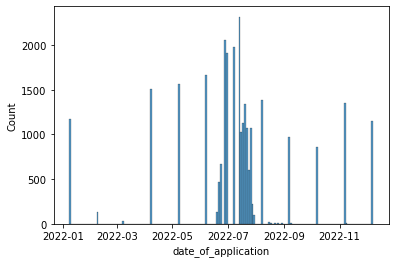

In [54]:
sns.histplot(x = data['date_of_application']);

Как видно из гистограммы, в начале каждого месяца года присутствуют выпады по количеству поданных заявлений

Проведем визуальную оценку соответствия даты подачи заявления на поступление и даты выражения согласия о зачислении. Цель данной оценки: выявление ошибок при подаче заявлений при вводе даты подачи вручную

In [55]:
test_data_before_with_agreement = data[data['date_of_application'] < '2022-06-20'][data['date_of_agreement'] > '1900-01-01']

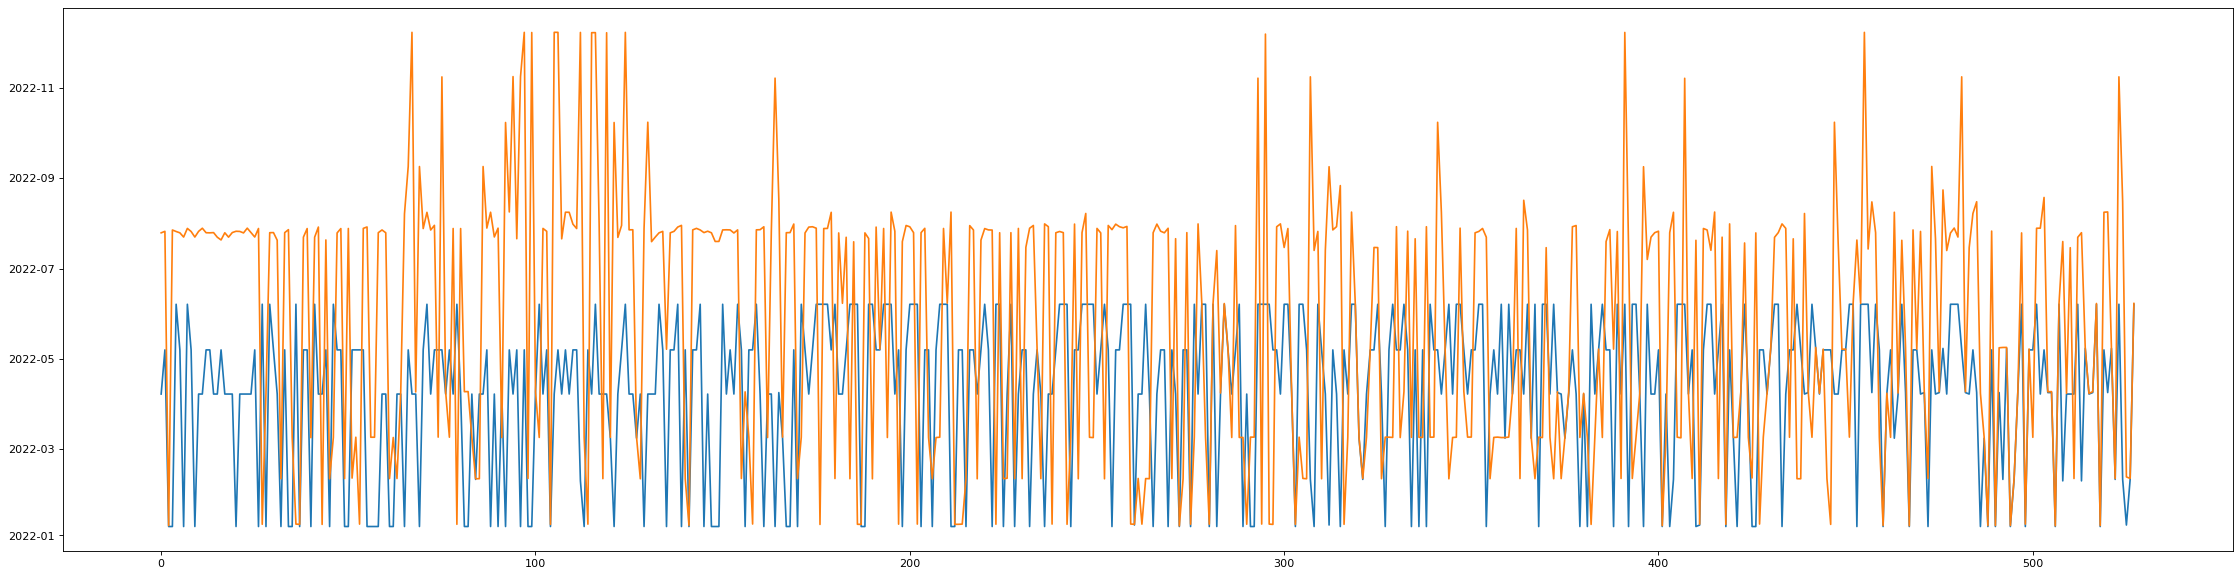

In [56]:
test_data_before_with_agreement.reset_index(inplace= True)

plot1 = test_data_before_with_agreement['date_of_application']
plot2 = test_data_before_with_agreement['date_of_agreement']
fig, ax = plt.subplots(1,1,figsize=(35, 9), dpi= 80)
plt.plot(plot1)
plt.plot(plot2)
plt.show()

Как видно из графика, есть заявители по датам до 20.06.2022, которые выразили свое согласие на зачисление гораздо раньше их подачи. Это свидетельствует о неправильности внесения данных

Выделяем часть данных, которые находятся за пределами официального периода приемной кампании (раньше 20.06.2022 и позже 27.07.2022)

In [57]:
test_data = data.loc[~((data['date_of_application'] < '2022-07-27')&(data['date_of_application'] > '2022-06-20'))]
test_data

,applicant_id,date_of_application,score,score_add,sex,date_of_birth,citizenship,basis,social_category,edu_form,grade,speciality,faculty,home_region,base_edu,year_of_base_grad,status_of_application,method_docs_delivery,date_of_agreement
0,702-875 69,2022-07-30,323,0,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.04 Градостроительство,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT
1,702-875 69,2022-07-30,323,0,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT
2,702-875 69,2022-07-30,323,0,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.01 Архитектура,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Зачислен,"Суперсервис ""Поступление в вуз онлайн""",2022-07-30 11:41:43
3,702-875 69,2022-07-30,323,0,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT
4,530-013 41,2022-04-07,301,0,Женский,2004-10-22,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Санкт-Петербург,Среднее общее,2022,Подано,Лично,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29456,02250,2022-11-07,0,0,Мужской,2005-01-14,ТАДЖИКИСТАН,бюджетная основа,На общих основаниях,очная,Бакалавр,08.03.01 Строительство,строительный факультет,NaN,Среднее общее,2022,Подано,Веб,NaT
29457,02250,2022-11-07,0,0,Мужской,2005-01-14,ТАДЖИКИСТАН,бюджетная основа,На общих основаниях,очная,Специалист,08.05.01 Строительство уникальных зданий и соо...,строительный факультет,NaN,Среднее общее,2022,Подано,Веб,NaT
29458,02250,2022-11-07,0,0,Мужской,2005-01-14,ТАДЖИКИСТАН,бюджетная основа,На общих основаниях,очная,Бакалавр,08.03.01 Строительство,факультет инженерной экологии и городского хоз...,NaN,Среднее общее,2022,Подано,Веб,NaT
29462,932-664 04,2022-07-29,0,0,Мужской,2002-06-24,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,Бакалавр,08.03.01 Строительство,строительный факультет,Мурманская обл,Среднее специальное,2021,Подано,Лично,NaT


Для замены даты на правильную создаем новые столбцы с годом, месяцем и днем существующей даты.

Затем отбираем только те строки, в которым номер дня меньше 13, т.к. в календаре всего 12 месяцев и номер месяца не может быть больше и равен 13.

В полученном наборе данных объединяем столбцы с днем, месяцем и годом в один так, чтобы номер дня стал номером месяца, а номер месяца - номером дня.

Затем подменяем данные в исходном столбце с датами новыми значениями

In [58]:
test_data['day'] = data['date_of_application'].dt.day
test_data['month'] = data['date_of_application'].dt.month
test_data['year'] = data['date_of_application'].dt.year
test_data

,applicant_id,date_of_application,score,score_add,sex,date_of_birth,citizenship,basis,social_category,edu_form,...,faculty,home_region,base_edu,year_of_base_grad,status_of_application,method_docs_delivery,date_of_agreement,day,month,year
0,702-875 69,2022-07-30,323,0,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT,30,7,2022
1,702-875 69,2022-07-30,323,0,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT,30,7,2022
2,702-875 69,2022-07-30,323,0,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Зачислен,"Суперсервис ""Поступление в вуз онлайн""",2022-07-30 11:41:43,30,7,2022
3,702-875 69,2022-07-30,323,0,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT,30,7,2022
4,530-013 41,2022-04-07,301,0,Женский,2004-10-22,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,архитектурный факультет,Санкт-Петербург,Среднее общее,2022,Подано,Лично,NaT,7,4,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29456,02250,2022-11-07,0,0,Мужской,2005-01-14,ТАДЖИКИСТАН,бюджетная основа,На общих основаниях,очная,...,строительный факультет,NaN,Среднее общее,2022,Подано,Веб,NaT,7,11,2022
29457,02250,2022-11-07,0,0,Мужской,2005-01-14,ТАДЖИКИСТАН,бюджетная основа,На общих основаниях,очная,...,строительный факультет,NaN,Среднее общее,2022,Подано,Веб,NaT,7,11,2022
29458,02250,2022-11-07,0,0,Мужской,2005-01-14,ТАДЖИКИСТАН,бюджетная основа,На общих основаниях,очная,...,факультет инженерной экологии и городского хоз...,NaN,Среднее общее,2022,Подано,Веб,NaT,7,11,2022
29462,932-664 04,2022-07-29,0,0,Мужской,2002-06-24,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,строительный факультет,Мурманская обл,Среднее специальное,2021,Подано,Лично,NaT,29,7,2022


In [59]:
test_data = test_data[test_data['day'] < 13]
test_data

,applicant_id,date_of_application,score,score_add,sex,date_of_birth,citizenship,basis,social_category,edu_form,...,faculty,home_region,base_edu,year_of_base_grad,status_of_application,method_docs_delivery,date_of_agreement,day,month,year
4,530-013 41,2022-04-07,301,0,Женский,2004-10-22,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,архитектурный факультет,Санкт-Петербург,Среднее общее,2022,Подано,Лично,NaT,7,4,2022
5,530-013 41,2022-04-07,301,0,Женский,2004-10-22,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,архитектурный факультет,Санкт-Петербург,Среднее общее,2022,Подано,Лично,NaT,7,4,2022
6,530-013 41,2022-04-07,301,0,Женский,2004-10-22,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,архитектурный факультет,Санкт-Петербург,Среднее общее,2022,Подано,Лично,NaT,7,4,2022
7,530-013 41,2022-04-07,301,0,Женский,2004-10-22,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,архитектурный факультет,Санкт-Петербург,Среднее общее,2022,Зачислен,Лично,2022-07-25 12:28:56,7,4,2022
22,131-087 02,2022-04-07,275,0,Женский,2002-03-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,архитектурный факультет,Санкт-Петербург,Среднее специальное,2022,Выбыл из конкурса,Лично,NaT,7,4,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29448,74598,2022-12-07,0,0,Мужской,1998-09-26,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,автомобильно-дорожный факультет,Челябинская обл,Среднее специальное,2018,Подано,Веб,NaT,7,12,2022
29449,74598,2022-12-07,0,0,Мужской,1998-09-26,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,автомобильно-дорожный факультет,Челябинская обл,Среднее специальное,2018,Подано,Веб,NaT,7,12,2022
29456,02250,2022-11-07,0,0,Мужской,2005-01-14,ТАДЖИКИСТАН,бюджетная основа,На общих основаниях,очная,...,строительный факультет,NaN,Среднее общее,2022,Подано,Веб,NaT,7,11,2022
29457,02250,2022-11-07,0,0,Мужской,2005-01-14,ТАДЖИКИСТАН,бюджетная основа,На общих основаниях,очная,...,строительный факультет,NaN,Среднее общее,2022,Подано,Веб,NaT,7,11,2022


In [60]:
test_data['new_date_of_application'] = test_data[['year', 'day', 'month']].astype(str).agg('-'. join , axis= 1)

In [61]:
test_data['new_date_of_application'] = pd.to_datetime(test_data['new_date_of_application'])

In [62]:
test_data

,applicant_id,date_of_application,score,score_add,sex,date_of_birth,citizenship,basis,social_category,edu_form,...,home_region,base_edu,year_of_base_grad,status_of_application,method_docs_delivery,date_of_agreement,day,month,year,new_date_of_application
4,530-013 41,2022-04-07,301,0,Женский,2004-10-22,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,Санкт-Петербург,Среднее общее,2022,Подано,Лично,NaT,7,4,2022,2022-07-04
5,530-013 41,2022-04-07,301,0,Женский,2004-10-22,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,Санкт-Петербург,Среднее общее,2022,Подано,Лично,NaT,7,4,2022,2022-07-04
6,530-013 41,2022-04-07,301,0,Женский,2004-10-22,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,Санкт-Петербург,Среднее общее,2022,Подано,Лично,NaT,7,4,2022,2022-07-04
7,530-013 41,2022-04-07,301,0,Женский,2004-10-22,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,Санкт-Петербург,Среднее общее,2022,Зачислен,Лично,2022-07-25 12:28:56,7,4,2022,2022-07-04
22,131-087 02,2022-04-07,275,0,Женский,2002-03-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,Санкт-Петербург,Среднее специальное,2022,Выбыл из конкурса,Лично,NaT,7,4,2022,2022-07-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29448,74598,2022-12-07,0,0,Мужской,1998-09-26,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,Челябинская обл,Среднее специальное,2018,Подано,Веб,NaT,7,12,2022,2022-07-12
29449,74598,2022-12-07,0,0,Мужской,1998-09-26,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,Челябинская обл,Среднее специальное,2018,Подано,Веб,NaT,7,12,2022,2022-07-12
29456,02250,2022-11-07,0,0,Мужской,2005-01-14,ТАДЖИКИСТАН,бюджетная основа,На общих основаниях,очная,...,NaN,Среднее общее,2022,Подано,Веб,NaT,7,11,2022,2022-07-11
29457,02250,2022-11-07,0,0,Мужской,2005-01-14,ТАДЖИКИСТАН,бюджетная основа,На общих основаниях,очная,...,NaN,Среднее общее,2022,Подано,Веб,NaT,7,11,2022,2022-07-11


In [63]:
test_data.date_of_application = test_data.new_date_of_application

In [64]:
test_data.drop(columns= ['day', 'month', 'year', 'new_date_of_application'], inplace= True)
test_data

,applicant_id,date_of_application,score,score_add,sex,date_of_birth,citizenship,basis,social_category,edu_form,grade,speciality,faculty,home_region,base_edu,year_of_base_grad,status_of_application,method_docs_delivery,date_of_agreement
4,530-013 41,2022-07-04,301,0,Женский,2004-10-22,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Санкт-Петербург,Среднее общее,2022,Подано,Лично,NaT
5,530-013 41,2022-07-04,301,0,Женский,2004-10-22,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Санкт-Петербург,Среднее общее,2022,Подано,Лично,NaT
6,530-013 41,2022-07-04,301,0,Женский,2004-10-22,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.04 Градостроительство,архитектурный факультет,Санкт-Петербург,Среднее общее,2022,Подано,Лично,NaT
7,530-013 41,2022-07-04,301,0,Женский,2004-10-22,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.01 Архитектура,архитектурный факультет,Санкт-Петербург,Среднее общее,2022,Зачислен,Лично,2022-07-25 12:28:56
22,131-087 02,2022-07-04,275,0,Женский,2002-03-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.04 Градостроительство,архитектурный факультет,Санкт-Петербург,Среднее специальное,2022,Выбыл из конкурса,Лично,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29448,74598,2022-07-12,0,0,Мужской,1998-09-26,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,23.03.03 Эксплуатация транспортно-технологичес...,автомобильно-дорожный факультет,Челябинская обл,Среднее специальное,2018,Подано,Веб,NaT
29449,74598,2022-07-12,0,0,Мужской,1998-09-26,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,23.03.01 Технология транспортных процессов,автомобильно-дорожный факультет,Челябинская обл,Среднее специальное,2018,Подано,Веб,NaT
29456,02250,2022-07-11,0,0,Мужской,2005-01-14,ТАДЖИКИСТАН,бюджетная основа,На общих основаниях,очная,Бакалавр,08.03.01 Строительство,строительный факультет,NaN,Среднее общее,2022,Подано,Веб,NaT
29457,02250,2022-07-11,0,0,Мужской,2005-01-14,ТАДЖИКИСТАН,бюджетная основа,На общих основаниях,очная,Специалист,08.05.01 Строительство уникальных зданий и соо...,строительный факультет,NaN,Среднее общее,2022,Подано,Веб,NaT


После удаления добавленных ранее столбцов (для возвращения формы данных к исходному состоянию) обновляем рабочий датасет данными с новыми датами. Проверяем правильность замены построением гистограммы, выводом описательной статистики. Делаем замену типа данных в признаках, которые до замены дат имели целочисленные значения, а после замены дат захотели быть числами с точкой

In [65]:
data.update(test_data)
data

,applicant_id,date_of_application,score,score_add,sex,date_of_birth,citizenship,basis,social_category,edu_form,grade,speciality,faculty,home_region,base_edu,year_of_base_grad,status_of_application,method_docs_delivery,date_of_agreement
0,702-875 69,2022-07-30,323.0,0.0,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.04 Градостроительство,архитектурный факультет,Татарстан Респ,Среднее общее,2022.0,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT
1,702-875 69,2022-07-30,323.0,0.0,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Татарстан Респ,Среднее общее,2022.0,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT
2,702-875 69,2022-07-30,323.0,0.0,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.01 Архитектура,архитектурный факультет,Татарстан Респ,Среднее общее,2022.0,Зачислен,"Суперсервис ""Поступление в вуз онлайн""",2022-07-30 11:41:43
3,702-875 69,2022-07-30,323.0,0.0,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Татарстан Респ,Среднее общее,2022.0,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT
4,530-013 41,2022-07-04,301.0,0.0,Женский,2004-10-22,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Санкт-Петербург,Среднее общее,2022.0,Подано,Лично,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29465,149-613 49,2022-07-22,0.0,0.0,Мужской,2000-07-25,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,08.03.01 Строительство,строительный факультет,Санкт-Петербург,Среднее общее,2018.0,Подано,Веб,NaT
29466,149-613 49,2022-07-22,0.0,0.0,Мужской,2000-07-25,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,15.03.03 Прикладная механика,автомобильно-дорожный факультет,Санкт-Петербург,Среднее общее,2018.0,Подано,Веб,NaT
29467,149-613 49,2022-07-22,0.0,0.0,Мужской,2000-07-25,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,01.03.02 Прикладная математика и информатика,строительный факультет,Санкт-Петербург,Среднее общее,2018.0,Подано,Веб,NaT
29468,149-613 49,2022-07-22,0.0,0.0,Мужской,2000-07-25,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,23.03.01 Технология транспортных процессов,автомобильно-дорожный факультет,Санкт-Петербург,Среднее общее,2018.0,Подано,Веб,NaT


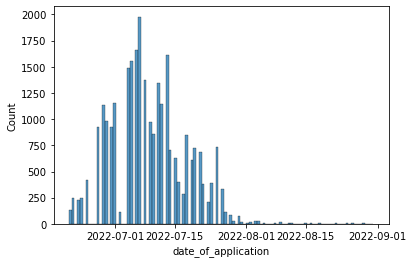

In [66]:
sns.histplot(x = data['date_of_application']);

In [67]:
data.duplicated().sum()

0

In [68]:
data.year_of_base_grad, data.score, data.score_add = data.year_of_base_grad.astype(int), data.score.astype(int), data.score_add.astype(int)

In [69]:
data.describe(datetime_is_numeric= True)

,date_of_application,score,score_add,date_of_birth,year_of_base_grad,date_of_agreement
count,27975,27975.000000,27975.000000,27975,27975.000000,2087
mean,2022-07-09 02:18:58.873994496,213.971153,0.659696,2004-03-11 15:39:55.495978624,2021.688865,2022-05-29 11:04:31.717776640
min,2022-06-20 00:00:00,0.000000,0.000000,1969-12-31 00:00:00,1900.000000,2022-01-07 10:03:05
25%,2022-07-04 00:00:00,185.000000,0.000000,2004-01-28 00:00:00,2022.000000,2022-03-08 11:55:03.500000
50%,2022-07-08 00:00:00,212.000000,0.000000,2004-06-02 00:00:00,2022.000000,2022-07-19 15:03:50
75%,2022-07-14 00:00:00,242.000000,0.000000,2004-09-21 00:00:00,2022.000000,2022-07-28 11:48:31
max,2022-08-31 00:00:00,382.000000,10.000000,2006-10-08 00:00:00,2022.000000,2022-12-09 16:35:27
std,NaN,57.701245,1.701108,NaN,1.951656,NaN


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27975 entries, 0 to 29469
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   applicant_id           27975 non-null  object        
 1   date_of_application    27975 non-null  datetime64[ns]
 2   score                  27975 non-null  int32         
 3   score_add              27975 non-null  int32         
 4   sex                    27975 non-null  object        
 5   date_of_birth          27975 non-null  datetime64[ns]
 6   citizenship            27958 non-null  object        
 7   basis                  27975 non-null  object        
 8   social_category        27975 non-null  object        
 9   edu_form               27975 non-null  object        
 10  grade                  27975 non-null  object        
 11  speciality             27975 non-null  object        
 12  faculty                27975 non-null  object        
 13  h

In [71]:
data[(data['date_of_application'] > '2022-08-06')&(data['status_of_application'] == 'Зачислен')]

,applicant_id,date_of_application,score,score_add,sex,date_of_birth,citizenship,basis,social_category,edu_form,grade,speciality,faculty,home_region,base_edu,year_of_base_grad,status_of_application,method_docs_delivery,date_of_agreement
1879,98137,2022-08-08,320,0,Женский,2004-06-01,АРМЕНИЯ,полное возмещение затрат,На общих основаниях,очная,Бакалавр,07.03.01 Архитектура,архитектурный факультет,Санкт-Петербург,Среднее общее,2022,Зачислен,Лично,2022-08-08 16:50:10
3115,96132,2022-08-12,289,0,Женский,2004-11-17,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,Бакалавр,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Новгородская обл,Среднее общее,2022,Зачислен,Веб,2022-12-08 14:11:16
6445,272-125 86,2022-08-31,247,0,Женский,2001-10-14,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,Бакалавр,40.03.01 Юриспруденция,факультет судебных экспертиз и права в строите...,Санкт-Петербург,Среднее общее,2019,Зачислен,Веб,2022-08-31 14:22:51
6935,332-832 77,2022-08-26,245,0,Женский,2004-12-30,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,Бакалавр,38.03.02 Менеджмент,факультет экономики и управления,Краснодарский край,Среднее общее,2022,Зачислен,Веб,2022-08-26 11:31:20
9898,620-243 96,2022-08-15,229,0,Женский,2004-01-04,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,Бакалавр,38.03.01 Экономика,факультет экономики и управления,Ленинградская обл,Среднее общее,2022,Зачислен,Лично,2022-08-15 13:17:21
11135,05811,2022-08-08,224,0,Женский,2003-05-16,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,Бакалавр,35.03.10 Ландшафтная архитектура,архитектурный факультет,Санкт-Петербург,Среднее общее,2020,Зачислен,Лично,2022-08-08 10:21:41
11629,994-231 39,2022-08-24,222,0,Мужской,2004-01-04,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,Специалист,40.05.03 Судебная экспертиза,факультет судебных экспертиз и права в строите...,Санкт-Петербург,Среднее общее,2022,Зачислен,Лично,2022-08-24 16:35:28
11804,818-703 96,2022-08-22,221,0,Женский,2004-05-01,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,Бакалавр,40.03.01 Юриспруденция,факультет судебных экспертиз и права в строите...,Оренбургская обл,Среднее общее,2022,Зачислен,Лично,2022-08-22 16:43:07
13636,78473,2022-08-16,215,0,Женский,2002-10-03,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,Бакалавр,38.03.01 Экономика,факультет экономики и управления,Санкт-Петербург,Среднее общее,2020,Зачислен,Веб,2022-08-18 15:27:57
14972,389-270 84,2022-08-16,210,0,Женский,2004-08-28,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,Специалист,40.05.03 Судебная экспертиза,факультет судебных экспертиз и права в строите...,Оренбургская обл,Среднее общее,2022,Зачислен,"Суперсервис ""Поступление в вуз онлайн""",2022-08-16 12:47:28


Дата начала приема документов: `20 июня 2022 года`

Дата завершения приема документов: `31 августа 2022 года`. В этот день подавали документы на обучение по основанию `'полное возмещение затрат'` и были зачислены

### 2. Общее количество заявлений, количество заявлений по факультетам и направлениям подготовки

Подробнее рассмотрим заявления на примере одного абитуриента

In [72]:
data[(data['applicant_id'].isin(['96291']))].sort_values(by= 'speciality')

,applicant_id,date_of_application,score,score_add,sex,date_of_birth,citizenship,basis,social_category,edu_form,grade,speciality,faculty,home_region,base_edu,year_of_base_grad,status_of_application,method_docs_delivery,date_of_agreement
345,96291,2022-07-11,227,0,Женский,2004-05-08,РОССИЯ,целевой прием,На общих основаниях,очная,Бакалавр,07.03.01 Архитектура,архитектурный факультет,Санкт-Петербург,Среднее общее,2022,Подано,Лично,NaT
10340,96291,2022-07-11,227,0,Женский,2004-05-08,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,Бакалавр,07.03.01 Архитектура,архитектурный факультет,Санкт-Петербург,Среднее общее,2022,Подано,Лично,NaT
10336,96291,2022-07-04,227,0,Женский,2004-05-08,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,Бакалавр,07.03.01 Архитектура,архитектурный факультет,Санкт-Петербург,Среднее общее,2022,Отозвано,"Суперсервис ""Поступление в вуз онлайн""",NaT
346,96291,2022-07-11,227,0,Женский,2004-05-08,РОССИЯ,целевой прием,На общих основаниях,очная,Бакалавр,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Санкт-Петербург,Среднее общее,2022,Подано,Лично,NaT
10338,96291,2022-07-04,227,0,Женский,2004-05-08,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,Бакалавр,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Санкт-Петербург,Среднее общее,2022,Отозвано,"Суперсервис ""Поступление в вуз онлайн""",NaT
10337,96291,2022-07-11,227,0,Женский,2004-05-08,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,Бакалавр,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Санкт-Петербург,Среднее общее,2022,Подано,Лично,NaT
10339,96291,2022-07-11,227,0,Женский,2004-05-08,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Санкт-Петербург,Среднее общее,2022,Подано,Лично,NaT
348,96291,2022-07-11,227,0,Женский,2004-05-08,РОССИЯ,целевой прием,На общих основаниях,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Санкт-Петербург,Среднее общее,2022,Подано,Лично,NaT
10334,96291,2022-07-08,227,0,Женский,2004-05-08,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Санкт-Петербург,Среднее общее,2022,Отозвано,"Суперсервис ""Поступление в вуз онлайн""",NaT
10335,96291,2022-07-04,227,0,Женский,2004-05-08,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,Бакалавр,07.03.04 Градостроительство,архитектурный факультет,Санкт-Петербург,Среднее общее,2022,Отозвано,"Суперсервис ""Поступление в вуз онлайн""",NaT


In [73]:
print('Общее количество заявлений {}'.format(data['date_of_application'].count()))

Общее количество заявлений 27975


#### Количество заявлений по факультетам

In [74]:
data['applicant_id'].groupby(by= data['faculty']).count().sort_values(ascending= False)

faculty
архитектурный факультет                                                 7336
строительный факультет                                                  6971
автомобильно-дорожный факультет                                         5818
факультет инженерной экологии и городского хозяйства                    5332
факультет экономики и управления                                        2033
факультет судебных экспертиз и права в строительстве и на транспорте     485
Name: applicant_id, dtype: int64

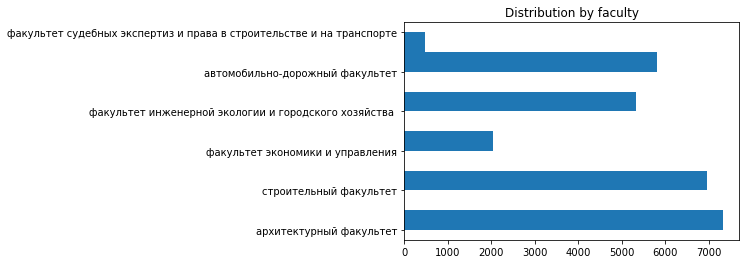

In [75]:
plt.hist(data['faculty'], orientation= 'horizontal')
plt.title('Distribution by faculty');

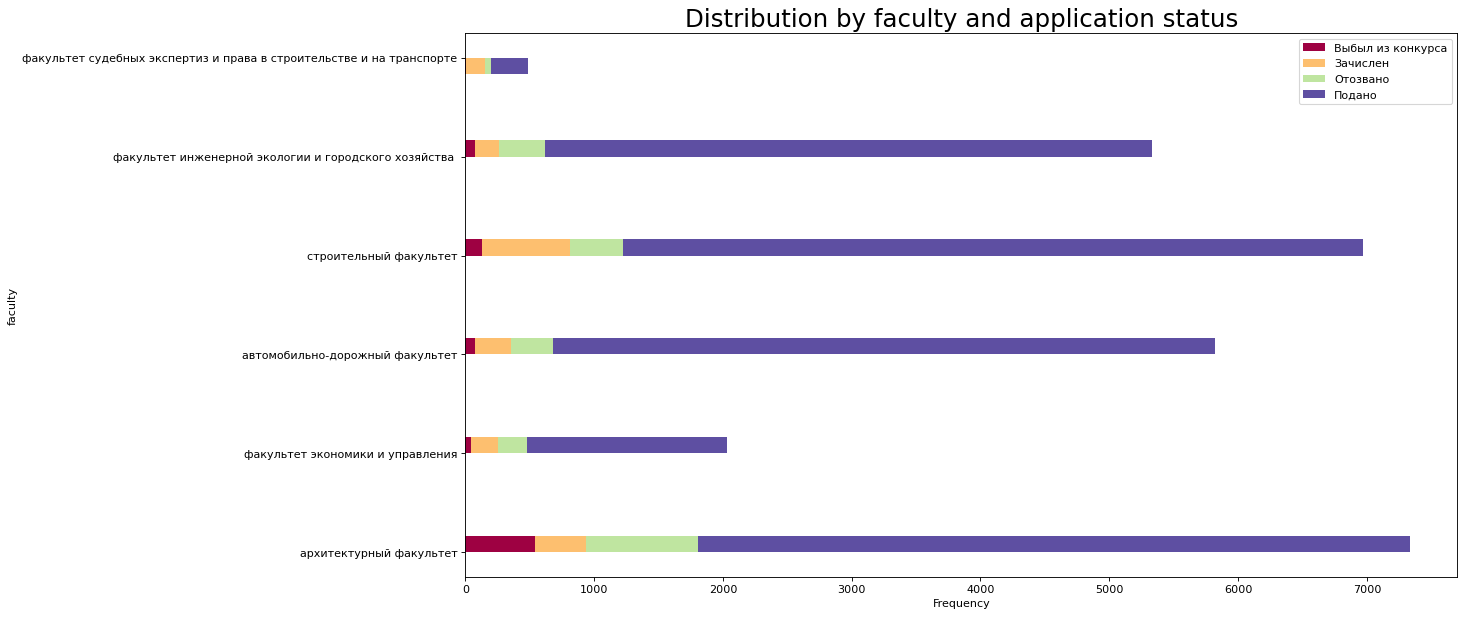

In [76]:
# Prepare data
x_var = 'faculty'
groupby_var = 'status_of_application'
df_agg = data.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)], orientation= 'horizontal')

# Decoration
plt.legend({group:col for group, col in zip(np.unique(data[groupby_var]).tolist(), colors[:len(vals)])})
plt.title('Distribution by faculty and application status', fontsize=22)
plt.xlabel('Frequency')
plt.ylabel(x_var)
# plt.ylim(0, 25)
# plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
# plt.hist(data['faculty'], orientation= 'horizontal')
plt.show()

#### По направлениям подготовки

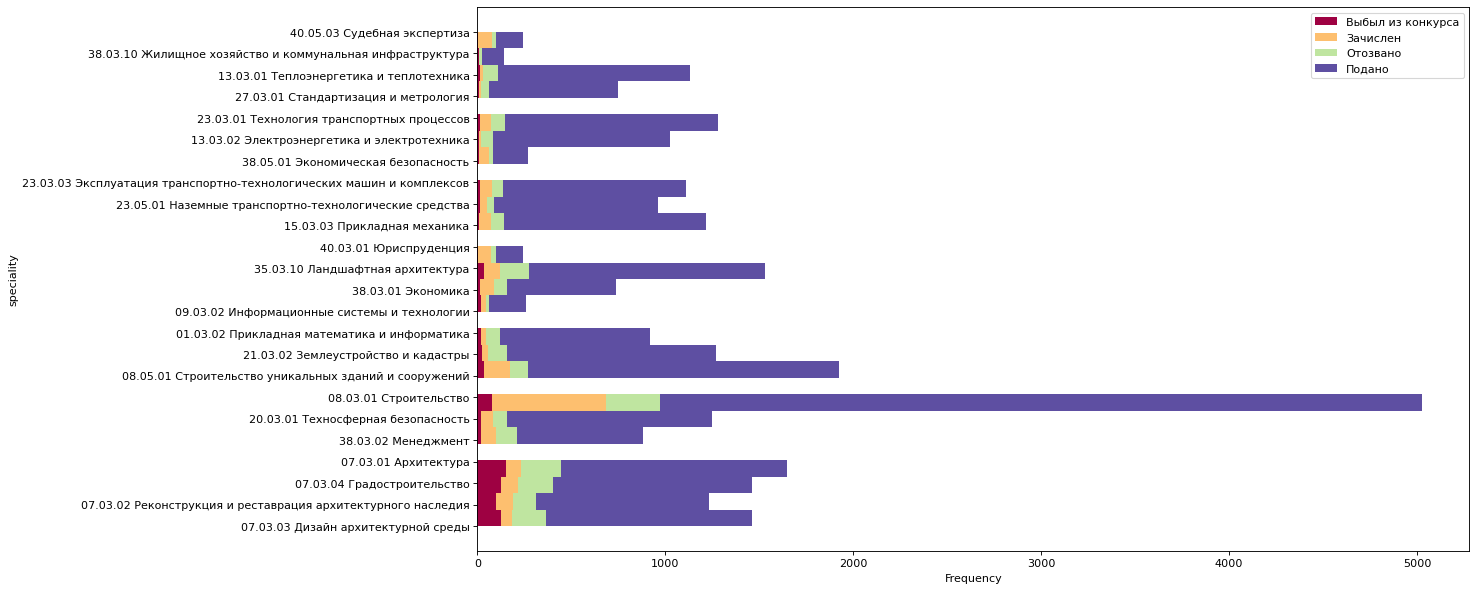

In [77]:
# Prepare data
x_var = 'speciality'
groupby_var = 'status_of_application'
df_agg = data.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)], orientation= 'horizontal')

# Decoration
plt.legend({group:col for group, col in zip(np.unique(data[groupby_var]).tolist(), colors[:len(vals)])})
# plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel('Frequency')
plt.ylabel(x_var)
# plt.ylim(0, 25)
# plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
# plt.hist(data['faculty'], orientation= 'horizontal')
plt.show()

In [78]:
spec_distrib = data['applicant_id'].groupby(by= data['speciality']).count().sort_values(ascending= False)
spec_distrib

speciality
08.03.01 Строительство                                                  5027
08.05.01 Строительство уникальных зданий и сооружений                   1926
07.03.01 Архитектура                                                    1646
35.03.10 Ландшафтная архитектура                                        1532
07.03.03 Дизайн архитектурной среды                                     1463
07.03.04 Градостроительство                                             1461
23.03.01 Технология транспортных процессов                              1280
21.03.02 Землеустройство и кадастры                                     1271
20.03.01 Техносферная безопасность                                      1251
07.03.02 Реконструкция и реставрация архитектурного наследия            1234
15.03.03 Прикладная механика                                            1214
13.03.01 Теплоэнергетика и теплотехника                                 1130
23.03.03 Эксплуатация транспортно-технологических машин и комплек

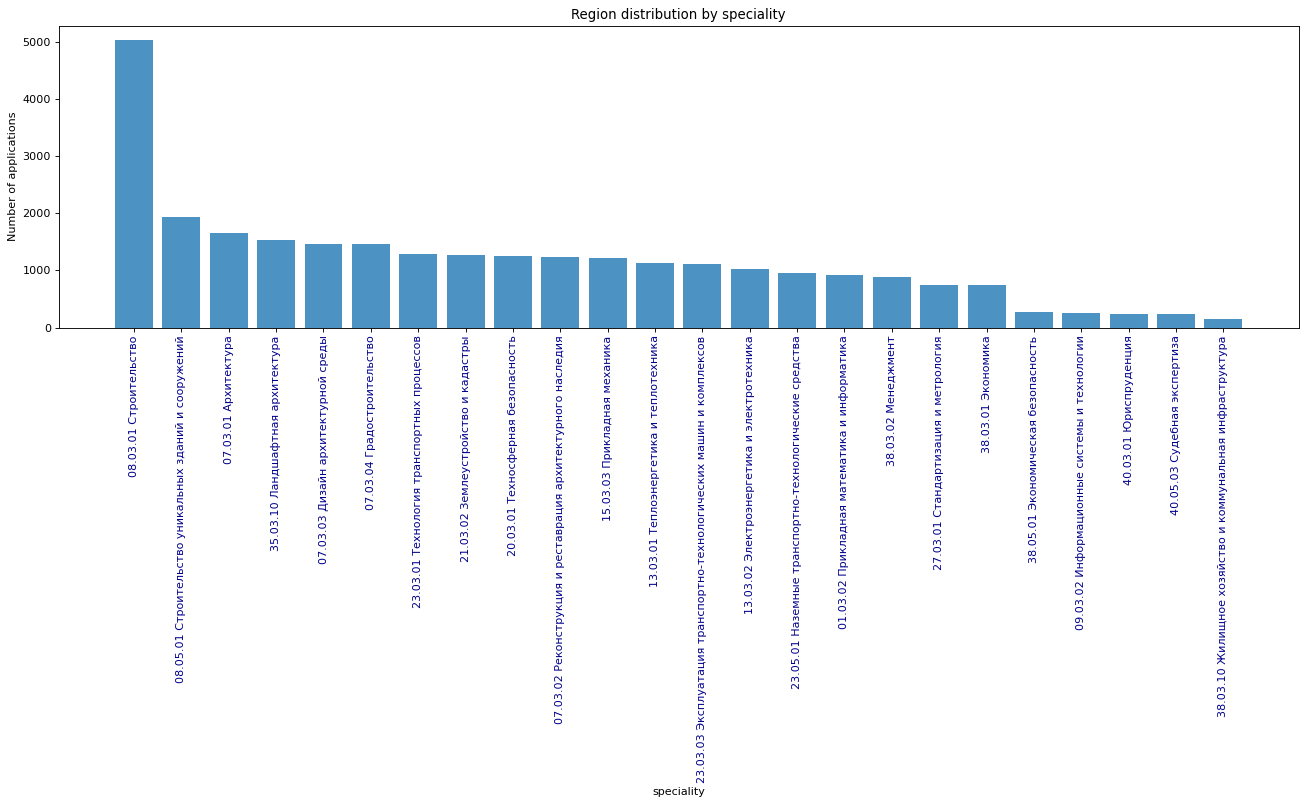

In [79]:
fig = plt.figure(figsize=(20,5), dpi= 80)

ax = fig.add_subplot()

ax.bar(spec_distrib.index, spec_distrib, alpha= .8)

xax = ax.xaxis
xlabels = xax.get_ticklabels()
for label in xlabels:
    label.set_rotation(90)
    label.set_color('darkblue')
# plt.ylim(0,600)
    
plt.title('Region distribution by speciality')
plt.ylabel('Number of applications')
plt.xlabel('speciality')
# plt.grid(True)
plt.show();

### 3. Количество уникальных абитуриентов

In [80]:
print('Количество уникальных абитуриентов {}'.format(data['applicant_id'].nunique()))

Количество уникальных абитуриентов 5334


### 4. Количество заявлений на одного абитуриента, среднее, медиана (используйте результаты метода describe())

In [81]:
data.describe(include= 'all', datetime_is_numeric= True)

,applicant_id,date_of_application,score,score_add,sex,date_of_birth,citizenship,basis,social_category,edu_form,grade,speciality,faculty,home_region,base_edu,year_of_base_grad,status_of_application,method_docs_delivery,date_of_agreement
count,27975,27975,27975.000000,27975.000000,27975,27975,27958,27975,27975,27975,27975,27975,27975,27558,27975,27975.000000,27975,27975,2087
unique,5334,NaN,NaN,NaN,2,NaN,22,3,2,1,2,24,6,87,3,NaN,4,4,NaN
top,96291,NaN,NaN,NaN,Женский,NaN,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,08.03.01 Строительство,архитектурный факультет,Санкт-Петербург,Среднее общее,NaN,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaN
freq,33,NaN,NaN,NaN,14285,NaN,27503,20006,27667,27975,24574,5027,7336,10158,26478,NaN,22977,10431,NaN
mean,NaN,2022-07-09 02:18:58.873994496,213.971153,0.659696,NaN,2004-03-11 15:39:55.495978624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.688865,NaN,NaN,2022-05-29 11:04:31.717776640
min,NaN,2022-06-20 00:00:00,0.000000,0.000000,NaN,1969-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900.000000,NaN,NaN,2022-01-07 10:03:05
25%,NaN,2022-07-04 00:00:00,185.000000,0.000000,NaN,2004-01-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.000000,NaN,NaN,2022-03-08 11:55:03.500000
50%,NaN,2022-07-08 00:00:00,212.000000,0.000000,NaN,2004-06-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.000000,NaN,NaN,2022-07-19 15:03:50
75%,NaN,2022-07-14 00:00:00,242.000000,0.000000,NaN,2004-09-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.000000,NaN,NaN,2022-07-28 11:48:31
max,NaN,2022-08-31 00:00:00,382.000000,10.000000,NaN,2006-10-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.000000,NaN,NaN,2022-12-09 16:35:27


In [82]:
data['date_of_application'].groupby(by= data['applicant_id']).count().sort_values(ascending= False)

applicant_id
96291         33
622-343 54    30
054-006 59    26
96124         26
817-608 21    23
              ..
585-259 26     1
583-638 84     1
583-457 01     1
583-239 88     1
99939          1
Name: date_of_application, Length: 5334, dtype: int64

In [83]:
data['date_of_application'].groupby(by= data['applicant_id']).count().describe()

count    5334.000000
mean        5.244657
std         4.024949
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        33.000000
Name: date_of_application, dtype: float64

Среднее количество заявлений на одного абитуриента: 5.24

Медиана количества заявлений: 4

Максимальное количество заявлений: 33

Минимальное количество заявлений: 1

### 5. Распределение по способам подачи документов

In [84]:
data.columns

Index(['applicant_id', 'date_of_application', 'score', 'score_add', 'sex',
       'date_of_birth', 'citizenship', 'basis', 'social_category', 'edu_form',
       'grade', 'speciality', 'faculty', 'home_region', 'base_edu',
       'year_of_base_grad', 'status_of_application', 'method_docs_delivery',
       'date_of_agreement'],
      dtype='object')

In [85]:
data['method_docs_delivery'].unique()

array(['Суперсервис "Поступление в вуз онлайн"', 'Лично', 'Веб', 'Почта'],
      dtype=object)

In [86]:
distr_methods = data['method_docs_delivery'].groupby(by= data['method_docs_delivery']).count().sort_values(ascending= False)
distr_methods

method_docs_delivery
Суперсервис "Поступление в вуз онлайн"    10431
Веб                                        8928
Лично                                      8473
Почта                                       143
Name: method_docs_delivery, dtype: int64

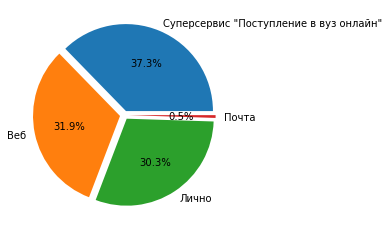

In [87]:
plt.pie(distr_methods, autopct='%.1f%%', labels= distr_methods.index, explode = (0.05,0.05,0.05,0.05))
plt.show()

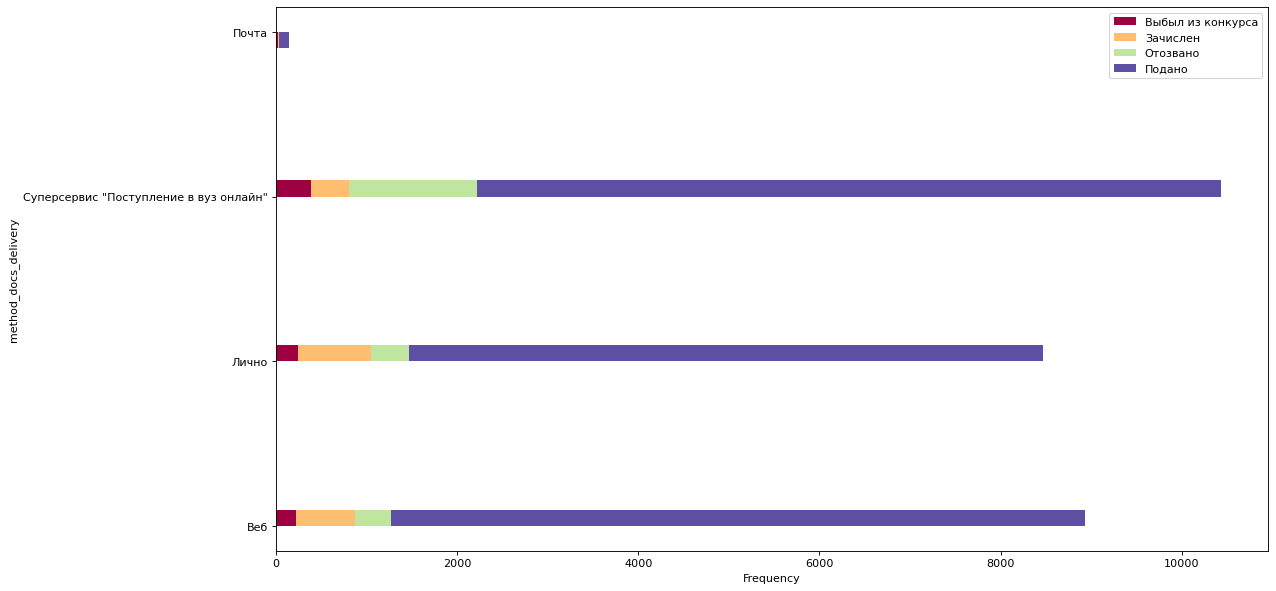

In [88]:
# Prepare data
x_var = 'method_docs_delivery'
groupby_var = 'status_of_application'
df_agg = data.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)], orientation= 'horizontal')

# Decoration
plt.legend({group:col for group, col in zip(np.unique(data[groupby_var]).tolist(), colors[:len(vals)])})
# plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel('Frequency')
plt.ylabel(x_var)
# plt.ylim(0, 25)
# plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
# plt.hist(data['faculty'], orientation= 'horizontal')
plt.show()

### 6. Распределение по основаниям поступления, уровням подготовки, образованию

#### Распределение по основаниям поступления

In [89]:
data['basis'].unique()

array(['бюджетная основа', 'целевой прием', 'полное возмещение затрат'],
      dtype=object)

In [90]:
distr_basis = data['basis'].groupby(by= data['basis']).count().sort_values(ascending= False)
distr_basis

basis
бюджетная основа            20006
полное возмещение затрат     7870
целевой прием                  99
Name: basis, dtype: int64

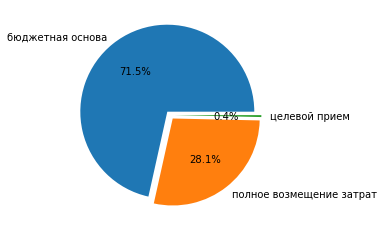

In [91]:
plt.pie(distr_basis, autopct='%.1f%%', labels= distr_basis.index, explode = (0.05,0.05,0.05))
plt.show()

#### Распределение по уровню подготовки

In [92]:
data['grade'].unique()

array(['Бакалавр', 'Специалист'], dtype=object)

In [93]:
distr_grade = data['grade'].groupby(by= data['grade']).count().sort_values(ascending= False)
distr_grade

grade
Бакалавр      24574
Специалист     3401
Name: grade, dtype: int64

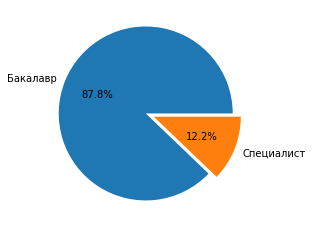

In [94]:
plt.pie(distr_grade, autopct='%.1f%%', labels= distr_grade.index, explode = (0.05,0.05))
plt.show()

#### Распределение по образованию

In [95]:
data['base_edu'].unique()

array(['Среднее общее', 'Среднее специальное', 'Высшее'], dtype=object)

In [96]:
distr_base_edu = data[['applicant_id', 'base_edu']].drop_duplicates()
distr_base_edu

,applicant_id,base_edu
0,702-875 69,Среднее общее
4,530-013 41,Среднее общее
8,853-207 15,Среднее общее
12,96659,Среднее специальное
14,354-557 60,Среднее общее
...,...,...
29447,74598,Среднее специальное
29453,041-541 96,Среднее общее
29456,02250,Среднее общее
29462,932-664 04,Среднее специальное


In [97]:
distr_base_edu['applicant_id'].duplicated().sum()

3

In [98]:
df_ = distr_base_edu[distr_base_edu['applicant_id'].duplicated(False)]
df_

,applicant_id,base_edu
3015,072-157 61,Среднее общее
3016,072-157 61,Высшее
12429,760-856 19,Высшее
12430,760-856 19,Среднее общее
29253,431-594 41,Среднее общее
29254,431-594 41,Среднее специальное


In [99]:
data[(data['applicant_id'].isin(['072-157 61', '760-856 19', '431-594 41']))].sort_values(by= 'applicant_id')[data['status_of_application'] != 'Отозвано']

,applicant_id,date_of_application,score,score_add,sex,date_of_birth,citizenship,basis,social_category,edu_form,grade,speciality,faculty,home_region,base_edu,year_of_base_grad,status_of_application,method_docs_delivery,date_of_agreement
3015,072-157 61,2022-07-06,292,0,Женский,2004-11-06,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,07.03.01 Архитектура,архитектурный факультет,Владимирская обл,Среднее общее,2022,Подано,Лично,NaT
29257,431-594 41,2022-07-21,0,0,Мужской,2000-05-26,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,08.03.01 Строительство,факультет инженерной экологии и городского хоз...,Рязанская обл,Среднее специальное,2021,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT
29256,431-594 41,2022-07-21,0,0,Мужской,2000-05-26,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,13.03.01 Теплоэнергетика и теплотехника,факультет инженерной экологии и городского хоз...,Рязанская обл,Среднее специальное,2021,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT
29253,431-594 41,2022-07-21,0,0,Мужской,2000-05-26,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,08.03.01 Строительство,строительный факультет,Рязанская обл,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT
29258,431-594 41,2022-07-13,0,0,Мужской,2000-05-26,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,Бакалавр,08.03.01 Строительство,строительный факультет,Рязанская обл,Среднее специальное,2021,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT
12433,760-856 19,2022-07-13,219,0,Мужской,2004-03-26,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,08.03.01 Строительство,строительный факультет,Амурская обл,Среднее общее,2022,Подано,Веб,NaT
12430,760-856 19,2022-07-13,219,0,Мужской,2004-03-26,РОССИЯ,бюджетная основа,На общих основаниях,очная,Специалист,08.05.01 Строительство уникальных зданий и соо...,строительный факультет,Амурская обл,Среднее общее,2022,Подано,Веб,NaT
12434,760-856 19,2022-07-13,219,0,Мужской,2004-03-26,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,08.03.01 Строительство,факультет инженерной экологии и городского хоз...,Амурская обл,Среднее общее,2022,Зачислен,Веб,2022-07-25 10:04:04
12435,760-856 19,2022-07-13,219,0,Мужской,2004-03-26,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,13.03.02 Электроэнергетика и электротехника,факультет инженерной экологии и городского хоз...,Амурская обл,Среднее общее,2022,Подано,Веб,NaT


Выделив из основного датасета персонажей, у которых "несколько" образований, также убрав из расчета заявления со статусом "Отозвано", можно увидеть то образование для данных абитуриентов, которое кажется истинным:

|  | applicant_id | base_edu |
| --- | --- | --- |
|3016	|072-157 61	  |  Среднее общее|
12430	|760-856 19	  |  Среднее общее
29254	|431-594 41	  |  Среднее специальное

In [100]:
distr_base_edu['base_edu'][distr_base_edu['applicant_id'] == '072-157 61'] = distr_base_edu['base_edu'][distr_base_edu['applicant_id'] == '072-157 61'].replace({'Высшее': 'Среднее общее'})
distr_base_edu[distr_base_edu['applicant_id'] == '072-157 61']

,applicant_id,base_edu
3015,072-157 61,Среднее общее
3016,072-157 61,Среднее общее


In [101]:
distr_base_edu['base_edu'][distr_base_edu['applicant_id'] == '760-856 19'] = distr_base_edu['base_edu'][distr_base_edu['applicant_id'] == '760-856 19'].replace({'Высшее': 'Среднее общее'})
distr_base_edu[distr_base_edu['applicant_id'] == '760-856 19']

,applicant_id,base_edu
12429,760-856 19,Среднее общее
12430,760-856 19,Среднее общее


In [102]:
distr_base_edu['base_edu'][distr_base_edu['applicant_id'] == '431-594 41'] = distr_base_edu['base_edu'][distr_base_edu['applicant_id'] == '431-594 41'].replace({'Среднее общее': 'Среднее специальное'})
distr_base_edu[distr_base_edu['applicant_id'] == '431-594 41']

,applicant_id,base_edu
29253,431-594 41,Среднее специальное
29254,431-594 41,Среднее специальное


In [103]:
distr_base_edu.drop_duplicates(inplace= True)
distr_base_edu

,applicant_id,base_edu
0,702-875 69,Среднее общее
4,530-013 41,Среднее общее
8,853-207 15,Среднее общее
12,96659,Среднее специальное
14,354-557 60,Среднее общее
...,...,...
29447,74598,Среднее специальное
29453,041-541 96,Среднее общее
29456,02250,Среднее общее
29462,932-664 04,Среднее специальное


In [104]:
distr_base_edu['applicant_id'].duplicated().sum()

0

In [105]:
distr_base_edu.duplicated().sum()

0

In [106]:
distr_base_edu_series = distr_base_edu['base_edu'].groupby(by= data['base_edu']).count().sort_values(ascending= False)
distr_base_edu_series

base_edu
Среднее общее          4939
Среднее специальное     383
Высшее                   12
Name: base_edu, dtype: int64

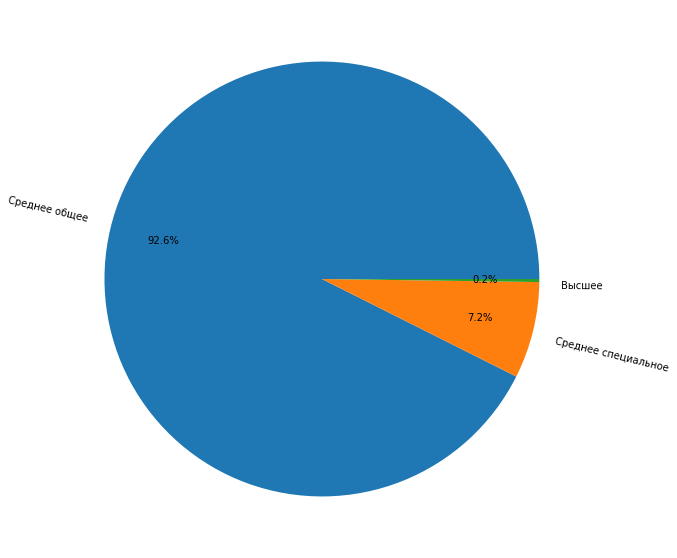

In [107]:
plt.figure(figsize=(10, 10))
plt.pie(distr_base_edu_series,
        autopct='%.1f%%',
        labels= distr_base_edu_series.index,
        pctdistance= 0.75,
#         explode = [0.5 for x in range(1,data['home_region'].nunique()+1)],
        rotatelabels= True)
plt.show()

### 7. Распределение по регионам, гражданству

Принимая во внимание наблюдение **`части 0`** о наличии `пропущенных` значений и значений `'-'` в признаках `home_region` и `citizenship`, в данном разделе они не будут удалены / исправлены. Это сделано из соображений оценки распределения на основе начальных данных (за исключением тех логических исправлений, которые были проведены ранее), в которые также входят ошибки с отсутствием данных

#### Распределение по регионам

Составим набор данных, содержащий только уникальных абитуриентов. Как ранее определили, абитуриентов в наборе - 5334 человека. Соответственно, ожидаем увидеть 5334 записи в наборе данных

In [108]:
distr_home_region = data[['applicant_id', 'home_region']].drop_duplicates()
distr_home_region

,applicant_id,home_region
0,702-875 69,Татарстан Респ
4,530-013 41,Санкт-Петербург
8,853-207 15,Санкт-Петербург
12,96659,Ханты-Мансийский АО - Югра АО
14,354-557 60,Мордовия Респ
...,...,...
29447,74598,Челябинская обл
29453,041-541 96,Санкт-Петербург
29456,02250,NaN
29462,932-664 04,Мурманская обл


Отлично! Набор данных содержит ожидаемое количество записей. Однако, убедимся в отсутствии дубликатов среди уникальных номеров абитуриентов

In [109]:
distr_home_region['applicant_id'].duplicated().sum()

0

Дубликатов нет. Принимаем полученный набор к дальнейшей работе

In [110]:
distr_regions = distr_home_region['home_region'].groupby(by= distr_home_region['home_region']).count().sort_values(ascending= False)
distr_regions

home_region
Санкт-Петербург       1827
Ленинградская обл      385
Краснодарский край     187
Татарстан Респ         129
Башкортостан Респ      112
                      ... 
Ингушетия Респ           4
Байконур г               3
Магаданская обл          3
Еврейская Аобл           3
-                        2
Name: home_region, Length: 87, dtype: int64

Строим по полученным данным диаграмму для визуализации и. соответственно, лучшего восприятия информации

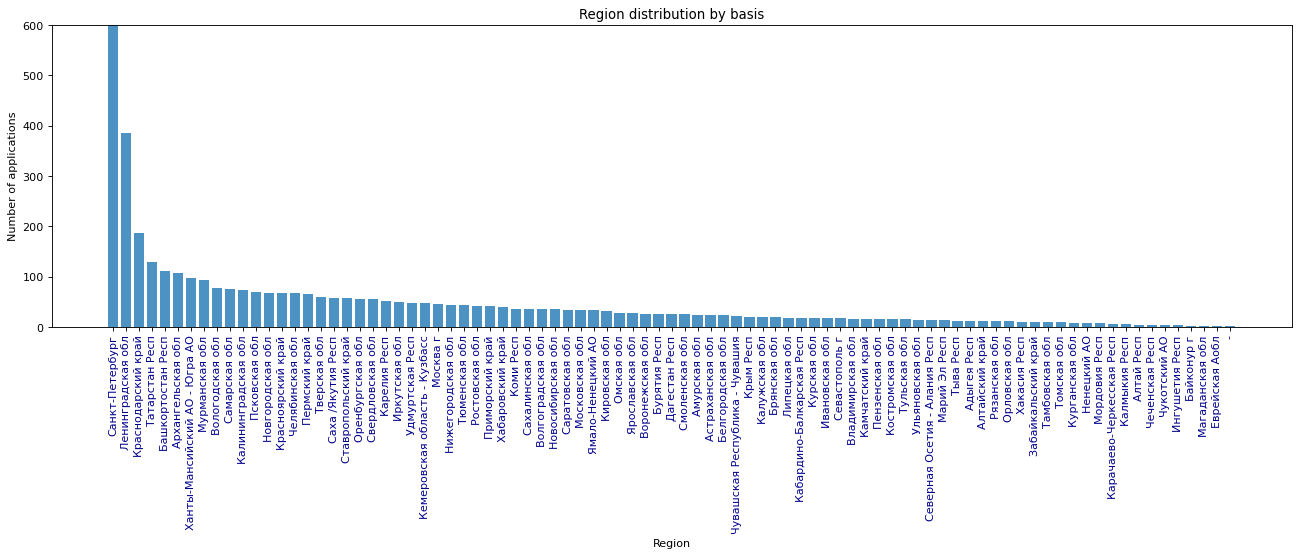

In [111]:
fig = plt.figure(figsize=(20,5), dpi= 80)

ax = fig.add_subplot()

ax.bar(distr_regions.index, distr_regions, alpha= .8)

xax = ax.xaxis
xlabels = xax.get_ticklabels()
for label in xlabels:
    label.set_rotation(90)
    label.set_color('darkblue')
plt.ylim(0,600)
    
plt.title('Region distribution by basis')
plt.ylabel('Number of applications')
plt.xlabel('Region')
# plt.grid(True)
plt.show();

#### Распределение по гражданству

In [112]:
data['citizenship'].unique()

array(['РОССИЯ', 'БЕЛАРУСЬ', 'КАЗАХСТАН', 'АРМЕНИЯ', 'ТУРКМЕНИЯ',
       'УЗБЕКИСТАН', 'УКРАИНА', nan, 'АЗЕРБАЙДЖАН', 'ЙЕМЕН', 'КИТАЙ',
       'ТУРЦИЯ', 'ИРАК', 'МАРОККО', 'ЛАТВИЯ', 'ТАДЖИКИСТАН', 'РУАНДА',
       'АЛЖИР', 'ГРУЗИЯ', 'КИРГИЗИЯ', 'ИРАН, ИСЛАМСКАЯ РЕСПУБЛИКА',
       'АФГАНИСТАН', 'САУДОВСКАЯ АРАВИЯ'], dtype=object)

In [113]:
distr_citizenship = data[['applicant_id', 'citizenship']].drop_duplicates()
distr_citizenship

,applicant_id,citizenship
0,702-875 69,РОССИЯ
4,530-013 41,РОССИЯ
8,853-207 15,РОССИЯ
12,96659,РОССИЯ
14,354-557 60,РОССИЯ
...,...,...
29447,74598,РОССИЯ
29453,041-541 96,РОССИЯ
29456,02250,ТАДЖИКИСТАН
29462,932-664 04,РОССИЯ


In [114]:
distr_citizenship['applicant_id'].duplicated().sum()

0

In [115]:
df_ = distr_citizenship[distr_citizenship['applicant_id'].duplicated(False)]
df_

,applicant_id,citizenship


In [116]:
distr_countries = distr_citizenship['citizenship'].groupby(by= distr_citizenship['citizenship']).count().sort_values(ascending= False)
distr_countries

citizenship
РОССИЯ                        5221
КАЗАХСТАН                       47
БЕЛАРУСЬ                        11
УЗБЕКИСТАН                       9
ТУРКМЕНИЯ                        9
ТАДЖИКИСТАН                      8
АЗЕРБАЙДЖАН                      4
КИТАЙ                            4
ЙЕМЕН                            2
КИРГИЗИЯ                         2
АЛЖИР                            2
МАРОККО                          2
АРМЕНИЯ                          2
ИРАН, ИСЛАМСКАЯ РЕСПУБЛИКА       1
ЛАТВИЯ                           1
ИРАК                             1
РУАНДА                           1
САУДОВСКАЯ АРАВИЯ                1
ГРУЗИЯ                           1
АФГАНИСТАН                       1
ТУРЦИЯ                           1
УКРАИНА                          1
Name: citizenship, dtype: int64

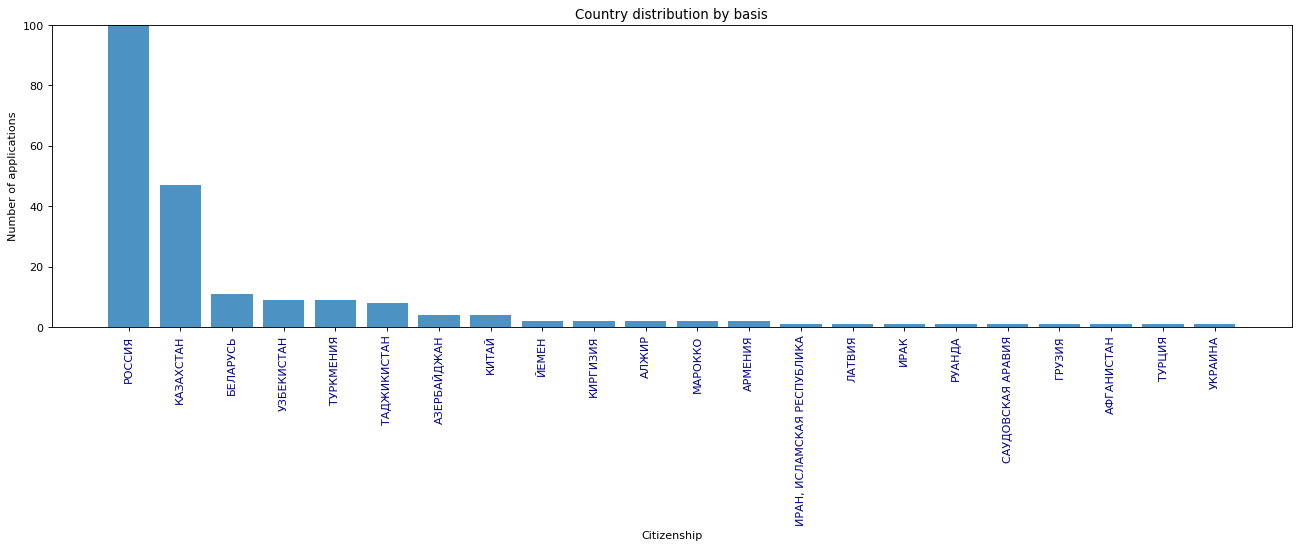

In [117]:
fig = plt.figure(figsize=(20,5), dpi= 80)

ax = fig.add_subplot()

ax.bar(distr_countries.index, distr_countries, alpha= .8)

xax = ax.xaxis
xlabels = xax.get_ticklabels()
for label in xlabels:
    label.set_rotation(90)
    label.set_color('darkblue')
plt.ylim(0,100)
    
plt.title('Country distribution by basis')
plt.ylabel('Number of applications')
plt.xlabel('Citizenship')
# plt.grid(True)
plt.show();

### 8. Количество согласий по направлениям подготовки до момента публикации конкурсных списков

Приведем в порядок дату согласия по аналогии с датой подачи заявления

In [118]:
data['date_of_agreement'].describe(datetime_is_numeric=True)

count                             2087
mean     2022-05-29 11:04:31.717776640
min                2022-01-07 10:03:05
25%         2022-03-08 11:55:03.500000
50%                2022-07-19 15:03:50
75%                2022-07-28 11:48:31
max                2022-12-09 16:35:27
Name: date_of_agreement, dtype: object

Построим простейшую гистограмму для оценки распределения дат

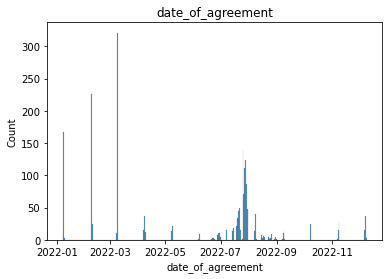

In [119]:
sns.histplot(x = data['date_of_agreement'], bins= 365)
plt.title('date_of_agreement');

Как видно из гистограммы, в начале каждого месяца года присутствуют выпады по количеству согласий

Выделяем часть данных, которые находятся за пределами официального периода приемной кампании (раньше 20.06.2022 и позже 27.07.2022)

In [120]:
test_data_agr = data.loc[(data['date_of_agreement'] > '1900-01-01')]
test_data_agr = test_data_agr.loc[~((test_data_agr['date_of_agreement'] < '2022-07-27')&(test_data_agr['date_of_agreement'] > '2022-06-20'))]
test_data_agr

,applicant_id,date_of_application,score,score_add,sex,date_of_birth,citizenship,basis,social_category,edu_form,grade,speciality,faculty,home_region,base_edu,year_of_base_grad,status_of_application,method_docs_delivery,date_of_agreement
2,702-875 69,2022-07-30,323,0,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.01 Архитектура,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Зачислен,"Суперсервис ""Поступление в вуз онлайн""",2022-07-30 11:41:43
12,96659,2022-07-20,288,0,Мужской,2000-01-23,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,35.03.10 Ландшафтная архитектура,архитектурный факультет,Ханты-Мансийский АО - Югра АО,Среднее специальное,2020,Зачислен,Веб,2022-07-27 16:45:04
16,354-557 60,2022-07-30,288,5,Женский,2004-05-08,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.01 Архитектура,архитектурный факультет,Мордовия Респ,Среднее общее,2022,Зачислен,"Суперсервис ""Поступление в вуз онлайн""",2022-07-30 13:32:33
37,782-989 39,2022-07-25,260,0,Женский,2004-04-03,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,08.03.01 Строительство,строительный факультет,Костромская обл,Среднее общее,2022,Зачислен,Лично,2022-07-27 17:49:05
46,98491,2022-07-01,257,5,Мужской,2004-12-11,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,08.03.01 Строительство,строительный факультет,Кабардино-Балкарская Респ,Среднее общее,2022,Зачислен,Веб,2022-01-07 15:52:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28730,925-969 46,2022-07-06,57,0,Женский,2003-12-13,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Санкт-Петербург,Среднее общее,2021,Подано,Веб,2022-06-07 13:06:13
29000,374-815 07,2022-07-20,0,0,Женский,2002-09-04,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,38.03.02 Менеджмент,факультет экономики и управления,Кемеровская область - Кузбасс,Среднее специальное,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",2022-07-27 11:20:34
29242,635-973 85,2022-07-16,0,0,Женский,2002-03-17,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,35.03.10 Ландшафтная архитектура,архитектурный факультет,Белгородская обл,Среднее специальное,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",2022-01-08 14:55:04
29348,908-220 60,2022-07-17,0,0,Женский,2002-11-04,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,Специалист,40.05.03 Судебная экспертиза,факультет судебных экспертиз и права в строите...,Марий Эл Респ,Среднее специальное,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",2022-01-08 14:00:41


Для замены даты на правильную создаем новые столбцы с годом, месяцем и днем существующей даты.

Затем отбираем только те строки, в которым номер дня меньше 13, т.к. в календаре всего 12 месяцев и номер месяца не может быть больше и равен 13.

В полученном наборе данных объединяем столбцы с днем, месяцем и годом в один так, чтобы номер дня стал номером месяца, а номер месяца - номером дня.

Затем подменяем данные в исходном столбце с датами новыми значениями

In [121]:
test_data_agr['day'] = test_data_agr['date_of_agreement'].dt.day
test_data_agr['month'] = test_data_agr['date_of_agreement'].dt.month
test_data_agr['year'] = test_data_agr['date_of_agreement'].dt.year
test_data_agr

,applicant_id,date_of_application,score,score_add,sex,date_of_birth,citizenship,basis,social_category,edu_form,...,faculty,home_region,base_edu,year_of_base_grad,status_of_application,method_docs_delivery,date_of_agreement,day,month,year
2,702-875 69,2022-07-30,323,0,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Зачислен,"Суперсервис ""Поступление в вуз онлайн""",2022-07-30 11:41:43,30,7,2022
12,96659,2022-07-20,288,0,Мужской,2000-01-23,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,архитектурный факультет,Ханты-Мансийский АО - Югра АО,Среднее специальное,2020,Зачислен,Веб,2022-07-27 16:45:04,27,7,2022
16,354-557 60,2022-07-30,288,5,Женский,2004-05-08,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,архитектурный факультет,Мордовия Респ,Среднее общее,2022,Зачислен,"Суперсервис ""Поступление в вуз онлайн""",2022-07-30 13:32:33,30,7,2022
37,782-989 39,2022-07-25,260,0,Женский,2004-04-03,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,строительный факультет,Костромская обл,Среднее общее,2022,Зачислен,Лично,2022-07-27 17:49:05,27,7,2022
46,98491,2022-07-01,257,5,Мужской,2004-12-11,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,строительный факультет,Кабардино-Балкарская Респ,Среднее общее,2022,Зачислен,Веб,2022-01-07 15:52:01,7,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28730,925-969 46,2022-07-06,57,0,Женский,2003-12-13,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,архитектурный факультет,Санкт-Петербург,Среднее общее,2021,Подано,Веб,2022-06-07 13:06:13,7,6,2022
29000,374-815 07,2022-07-20,0,0,Женский,2002-09-04,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,факультет экономики и управления,Кемеровская область - Кузбасс,Среднее специальное,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",2022-07-27 11:20:34,27,7,2022
29242,635-973 85,2022-07-16,0,0,Женский,2002-03-17,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,архитектурный факультет,Белгородская обл,Среднее специальное,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",2022-01-08 14:55:04,8,1,2022
29348,908-220 60,2022-07-17,0,0,Женский,2002-11-04,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,факультет судебных экспертиз и права в строите...,Марий Эл Респ,Среднее специальное,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",2022-01-08 14:00:41,8,1,2022


In [122]:
test_data_agr = test_data_agr[test_data_agr['day'] < 13]
test_data_agr

,applicant_id,date_of_application,score,score_add,sex,date_of_birth,citizenship,basis,social_category,edu_form,...,faculty,home_region,base_edu,year_of_base_grad,status_of_application,method_docs_delivery,date_of_agreement,day,month,year
46,98491,2022-07-01,257,5,Мужской,2004-12-11,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,строительный факультет,Кабардино-Балкарская Респ,Среднее общее,2022,Зачислен,Веб,2022-01-07 15:52:01,7,1,2022
83,947-972 92,2022-07-25,223,0,Мужской,2004-01-17,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,архитектурный факультет,Саха /Якутия Респ,Среднее общее,2022,Зачислен,Веб,2022-01-08 13:01:14,8,1,2022
171,00496,2022-07-25,191,0,Женский,2004-08-31,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,архитектурный факультет,Псковская обл,Среднее общее,2022,Зачислен,Лично,2022-02-08 14:30:30,8,2,2022
203,100-601 72,2022-06-28,175,0,Женский,2002-05-03,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,строительный факультет,Тульская обл,Среднее специальное,2021,Зачислен,Веб,2022-01-08 13:00:33,8,1,2022
301,164-053 49,2022-07-11,30,0,Женский,2004-04-19,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,архитектурный факультет,Иркутская обл,Среднее общее,2022,Выбыл из конкурса,Веб,2022-11-07 16:19:22,7,11,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28688,284-206 07,2022-07-11,65,0,Мужской,2001-01-24,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,строительный факультет,Бурятия Респ,Среднее специальное,2020,Выбыл из конкурса,Лично,2022-11-07 11:08:23,7,11,2022
28730,925-969 46,2022-07-06,57,0,Женский,2003-12-13,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,архитектурный факультет,Санкт-Петербург,Среднее общее,2021,Подано,Веб,2022-06-07 13:06:13,7,6,2022
29242,635-973 85,2022-07-16,0,0,Женский,2002-03-17,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,архитектурный факультет,Белгородская обл,Среднее специальное,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",2022-01-08 14:55:04,8,1,2022
29348,908-220 60,2022-07-17,0,0,Женский,2002-11-04,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,факультет судебных экспертиз и права в строите...,Марий Эл Респ,Среднее специальное,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",2022-01-08 14:00:41,8,1,2022


In [123]:
test_data_agr['new_date_of_agreement'] = test_data_agr[['year', 'day', 'month']].astype(str).agg('-'. join , axis= 1)

In [124]:
test_data_agr['new_date_of_agreement'] = pd.to_datetime(test_data_agr['new_date_of_agreement'])

In [125]:
test_data_agr

,applicant_id,date_of_application,score,score_add,sex,date_of_birth,citizenship,basis,social_category,edu_form,...,home_region,base_edu,year_of_base_grad,status_of_application,method_docs_delivery,date_of_agreement,day,month,year,new_date_of_agreement
46,98491,2022-07-01,257,5,Мужской,2004-12-11,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,Кабардино-Балкарская Респ,Среднее общее,2022,Зачислен,Веб,2022-01-07 15:52:01,7,1,2022,2022-07-01
83,947-972 92,2022-07-25,223,0,Мужской,2004-01-17,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,Саха /Якутия Респ,Среднее общее,2022,Зачислен,Веб,2022-01-08 13:01:14,8,1,2022,2022-08-01
171,00496,2022-07-25,191,0,Женский,2004-08-31,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,Псковская обл,Среднее общее,2022,Зачислен,Лично,2022-02-08 14:30:30,8,2,2022,2022-08-02
203,100-601 72,2022-06-28,175,0,Женский,2002-05-03,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,Тульская обл,Среднее специальное,2021,Зачислен,Веб,2022-01-08 13:00:33,8,1,2022,2022-08-01
301,164-053 49,2022-07-11,30,0,Женский,2004-04-19,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,Иркутская обл,Среднее общее,2022,Выбыл из конкурса,Веб,2022-11-07 16:19:22,7,11,2022,2022-07-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28688,284-206 07,2022-07-11,65,0,Мужской,2001-01-24,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,Бурятия Респ,Среднее специальное,2020,Выбыл из конкурса,Лично,2022-11-07 11:08:23,7,11,2022,2022-07-11
28730,925-969 46,2022-07-06,57,0,Женский,2003-12-13,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,Санкт-Петербург,Среднее общее,2021,Подано,Веб,2022-06-07 13:06:13,7,6,2022,2022-07-06
29242,635-973 85,2022-07-16,0,0,Женский,2002-03-17,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,Белгородская обл,Среднее специальное,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",2022-01-08 14:55:04,8,1,2022,2022-08-01
29348,908-220 60,2022-07-17,0,0,Женский,2002-11-04,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,Марий Эл Респ,Среднее специальное,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",2022-01-08 14:00:41,8,1,2022,2022-08-01


In [126]:
test_data_agr.date_of_agreement = test_data_agr.new_date_of_agreement

In [127]:
test_data_agr.drop(columns= ['day', 'month', 'year', 'new_date_of_agreement'], inplace= True)
test_data_agr

,applicant_id,date_of_application,score,score_add,sex,date_of_birth,citizenship,basis,social_category,edu_form,grade,speciality,faculty,home_region,base_edu,year_of_base_grad,status_of_application,method_docs_delivery,date_of_agreement
46,98491,2022-07-01,257,5,Мужской,2004-12-11,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,08.03.01 Строительство,строительный факультет,Кабардино-Балкарская Респ,Среднее общее,2022,Зачислен,Веб,2022-07-01
83,947-972 92,2022-07-25,223,0,Мужской,2004-01-17,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,35.03.10 Ландшафтная архитектура,архитектурный факультет,Саха /Якутия Респ,Среднее общее,2022,Зачислен,Веб,2022-08-01
171,00496,2022-07-25,191,0,Женский,2004-08-31,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,35.03.10 Ландшафтная архитектура,архитектурный факультет,Псковская обл,Среднее общее,2022,Зачислен,Лично,2022-08-02
203,100-601 72,2022-06-28,175,0,Женский,2002-05-03,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,08.03.01 Строительство,строительный факультет,Тульская обл,Среднее специальное,2021,Зачислен,Веб,2022-08-01
301,164-053 49,2022-07-11,30,0,Женский,2004-04-19,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.01 Архитектура,архитектурный факультет,Иркутская обл,Среднее общее,2022,Выбыл из конкурса,Веб,2022-07-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28688,284-206 07,2022-07-11,65,0,Мужской,2001-01-24,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,08.03.01 Строительство,строительный факультет,Бурятия Респ,Среднее специальное,2020,Выбыл из конкурса,Лично,2022-07-11
28730,925-969 46,2022-07-06,57,0,Женский,2003-12-13,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Санкт-Петербург,Среднее общее,2021,Подано,Веб,2022-07-06
29242,635-973 85,2022-07-16,0,0,Женский,2002-03-17,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,35.03.10 Ландшафтная архитектура,архитектурный факультет,Белгородская обл,Среднее специальное,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",2022-08-01
29348,908-220 60,2022-07-17,0,0,Женский,2002-11-04,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,Специалист,40.05.03 Судебная экспертиза,факультет судебных экспертиз и права в строите...,Марий Эл Респ,Среднее специальное,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",2022-08-01


После удаления добавленных ранее столбцов (для возвращения формы данных к исходному состоянию) обновляем рабочий датасет данными с новыми датами. Проверяем правильность замены построением гистограммы, выводом описательной статистики. Делаем замену типа данных в признаках, которые до замены дат имели целочисленные значения, а после замены дат захотели быть числами с точкой

In [128]:
data.update(test_data_agr)
data

,applicant_id,date_of_application,score,score_add,sex,date_of_birth,citizenship,basis,social_category,edu_form,grade,speciality,faculty,home_region,base_edu,year_of_base_grad,status_of_application,method_docs_delivery,date_of_agreement
0,702-875 69,2022-07-30,323.0,0.0,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.04 Градостроительство,архитектурный факультет,Татарстан Респ,Среднее общее,2022.0,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT
1,702-875 69,2022-07-30,323.0,0.0,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Татарстан Респ,Среднее общее,2022.0,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT
2,702-875 69,2022-07-30,323.0,0.0,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.01 Архитектура,архитектурный факультет,Татарстан Респ,Среднее общее,2022.0,Зачислен,"Суперсервис ""Поступление в вуз онлайн""",2022-07-30 11:41:43
3,702-875 69,2022-07-30,323.0,0.0,Женский,2004-08-14,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Татарстан Респ,Среднее общее,2022.0,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT
4,530-013 41,2022-07-04,301.0,0.0,Женский,2004-10-22,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Санкт-Петербург,Среднее общее,2022.0,Подано,Лично,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29465,149-613 49,2022-07-22,0.0,0.0,Мужской,2000-07-25,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,08.03.01 Строительство,строительный факультет,Санкт-Петербург,Среднее общее,2018.0,Подано,Веб,NaT
29466,149-613 49,2022-07-22,0.0,0.0,Мужской,2000-07-25,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,15.03.03 Прикладная механика,автомобильно-дорожный факультет,Санкт-Петербург,Среднее общее,2018.0,Подано,Веб,NaT
29467,149-613 49,2022-07-22,0.0,0.0,Мужской,2000-07-25,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,01.03.02 Прикладная математика и информатика,строительный факультет,Санкт-Петербург,Среднее общее,2018.0,Подано,Веб,NaT
29468,149-613 49,2022-07-22,0.0,0.0,Мужской,2000-07-25,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,23.03.01 Технология транспортных процессов,автомобильно-дорожный факультет,Санкт-Петербург,Среднее общее,2018.0,Подано,Веб,NaT


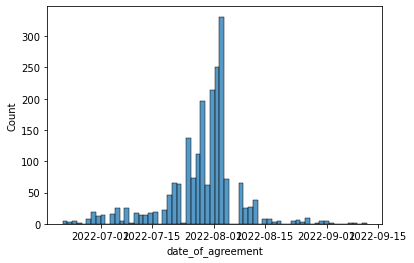

In [129]:
sns.histplot(x = data['date_of_agreement']);

In [130]:
data.duplicated().sum()

0

In [131]:
data.year_of_base_grad, data.score, data.score_add = data.year_of_base_grad.astype(int), data.score.astype(int), data.score_add.astype(int)

In [132]:
data.describe(datetime_is_numeric= True)

,date_of_application,score,score_add,date_of_birth,year_of_base_grad,date_of_agreement
count,27975,27975.000000,27975.000000,27975,27975.000000,2087
mean,2022-07-09 02:18:58.873994496,213.971153,0.659696,2004-03-11 15:39:55.495978624,2021.688865,2022-07-28 23:39:10.198370560
min,2022-06-20 00:00:00,0.000000,0.000000,1969-12-31 00:00:00,1900.000000,2022-06-20 13:26:35
25%,2022-07-04 00:00:00,185.000000,0.000000,2004-01-28 00:00:00,2022.000000,2022-07-25 15:52:36
50%,2022-07-08 00:00:00,212.000000,0.000000,2004-06-02 00:00:00,2022.000000,2022-07-31 19:37:00
75%,2022-07-14 00:00:00,242.000000,0.000000,2004-09-21 00:00:00,2022.000000,2022-08-03 00:00:00
max,2022-08-31 00:00:00,382.000000,10.000000,2006-10-08 00:00:00,2022.000000,2022-09-12 00:00:00
std,NaN,57.701245,1.701108,NaN,1.951656,NaN


In [133]:
data['date_of_agreement']

0                       NaT
1                       NaT
2       2022-07-30 11:41:43
3                       NaT
4                       NaT
                ...        
29465                   NaT
29466                   NaT
29467                   NaT
29468                   NaT
29469                   NaT
Name: date_of_agreement, Length: 27975, dtype: datetime64[ns]

In [134]:
print('Количество согласий всего до публикации конкурсных списков: {}'.format(data['date_of_agreement'][data['date_of_agreement'] < '2022-09-13'].count()))

Количество согласий всего до публикации конкурсных списков: 2087


## Выводы части 1

Определены следующие параметры по `очной` форме обучения
1. Дата начала приема документов: 20 июня 2022 года, дата окончания приема документов: 31 июня 2022 года
1. Общее количество заявлений 27 975, количество заявлений по факультетам: наибольшее - архитектурный 7336, наименьший - судебной экспертизы - 485; по направлениям подготовки: ТОП-3 08.03.01 Строительство 18,0%, 08.05.01 Строительство уникальных зданий 6,9%, 07.03.01 Архитектура 5,9%
1. Количество уникальных абитуриентов 5334
1. Количество заявлений на одного абитуриента (максимальное 33, минимальное 1), среднее = 5,24, медиана = 4
1. Распределение по способам подачи документов: самый популярный "Суперсервис "Поступление в вуз онлайн" - 37,5 %, самый редко используемый Почта - 0,5 %
1. Распределение по основаниям поступления (бюджет 71,5%, полное возмещение 28,1%, целевой 0,4%), уровням подготовки (бакалавриат 87,8%, специалитет 12,2%), образованию (высшее 0,2%, среднее специальное 7,2%, общее среднее 92,6%)
1. Распределение по регионам (ТОП-3: Санкт-Петербург 34,9%, Лен.область 7,4%, Краснодарский край 3,6%), гражданству (более 2% абитуриентов не имеют российского гражданства)
1. Количество согласий по направлениям подготовки до момента публикации конкурсных списков (631 согласие)

# Часть 2 - Портрет абитуриента

Выберите 2 категории из предложенных и сравните их портреты:

1. Зачисленный на бюджет абитуриент
2. Зачисленный на контракт абитуриент
3. Ушедший абитуриент (обратите внимание, что нужно оставить только тех, кто не был зачислен ни по одному направлению подготовки)

Состав портрета:
* пол,
* возраст,
* где учился,
* где живет (Санкт-Петербург или регионы, может какой-то регион в среднем более активен),
* какие направления подготовки выбирал (т.е. самые популярные направления подготовки),
* сколько подал заявлений, каким способом,
* какие у него баллы вступительных испытаний.

Что еще важное можно сказать о нем?

#### Создадим набор данных с характеристиками абитуриентов

Базу создаем из основного рабочего датасета **`data`**, оставляя только уникальных абитуриентов и характеристики, присущие абитуриентам, а не заявлениям

In [135]:
applicants = data.drop_duplicates(subset= 'applicant_id', ignore_index= True).sort_values(by= 'applicant_id').reset_index().drop(columns= ['index', 'date_of_application', 'basis', 'edu_form', 'grade', 'speciality', 'faculty', 'status_of_application', 'method_docs_delivery', 'date_of_agreement'])
applicants

,applicant_id,score,score_add,sex,date_of_birth,citizenship,social_category,home_region,base_edu,year_of_base_grad
0,00044,0,0,Мужской,2004-09-23,КАЗАХСТАН,На общих основаниях,NaN,Среднее общее,2022
1,00050,0,0,Женский,2004-09-10,КАЗАХСТАН,На общих основаниях,NaN,Среднее общее,2022
2,00096,246,0,Женский,2005-04-13,БЕЛАРУСЬ,На общих основаниях,NaN,Среднее общее,2022
3,001-307 40,226,0,Мужской,2004-08-10,РОССИЯ,На общих основаниях,Ленинградская обл,Среднее общее,2022
4,001-659 52,182,0,Мужской,2004-06-02,РОССИЯ,На общих основаниях,Ярославская обл,Среднее общее,2022
...,...,...,...,...,...,...,...,...,...,...
5329,99879,133,0,Мужской,2004-12-07,РОССИЯ,На общих основаниях,Санкт-Петербург,Среднее общее,2022
5330,99881,270,0,Женский,2003-01-06,УЗБЕКИСТАН,На общих основаниях,NaN,Среднее общее,2021
5331,99906,150,0,Мужской,2000-02-25,ЛАТВИЯ,На общих основаниях,NaN,Среднее специальное,2020
5332,99926,267,0,Мужской,2004-04-08,БЕЛАРУСЬ,На общих основаниях,NaN,Среднее общее,2022


#### В заключительной части **`части 0`** выявлено наличие `пропущенных` значений и значений `'-'` в признаках `home_region` и `citizenship`, которые в данной части будут заменены

Заполняем пропуски признака `home_region` (регион по прописке) по следующим соображениям:

* Если абитуриент не имеет гражданства России, то его домашний регион заполняем тем же значением, что и гражданство. Это позволит нам на этапе анализа домашнего региона увидеть еще и иностранные регионы
* Если абитуриент с российским гражданством, пропуски заполняем по наиболее частому региону

Сначала приведем значения `'-'` к значениям `nan`, а затем заменим все пропущенные значения

Проверим количество абитуриентов, имеющих значение `'-'` в признаке `'home_region'`

In [136]:
applicants[applicants['home_region'] == '-']

,applicant_id,score,score_add,sex,date_of_birth,citizenship,social_category,home_region,base_edu,year_of_base_grad
3917,740-975 15,100,0,Мужской,2003-10-27,КИРГИЗИЯ,На общих основаниях,-,Среднее общее,2022
4853,934-317 01,268,5,Женский,2004-08-13,РОССИЯ,На общих основаниях,-,Среднее общее,2022


Всего два значения. Заменим их на пустое значение

In [137]:
applicants[applicants['home_region'] == '-'] = applicants[applicants['home_region'] == '-'].replace({'-': np.nan})

Проверим количество пустых значений в признаках `home_region` и `citizenship`

In [138]:
applicants[applicants['citizenship'].isna()]

,applicant_id,score,score_add,sex,date_of_birth,citizenship,social_category,home_region,base_edu,year_of_base_grad
78,01249,239,0,Женский,2004-09-30,NaN,На общих основаниях,NaN,Среднее общее,2022
229,038-022 14,0,0,Мужской,1985-06-10,NaN,На общих основаниях,Санкт-Петербург,Среднее общее,2021


In [139]:
applicants[applicants['home_region'].isnull()]

,applicant_id,score,score_add,sex,date_of_birth,citizenship,social_category,home_region,base_edu,year_of_base_grad
0,00044,0,0,Мужской,2004-09-23,КАЗАХСТАН,На общих основаниях,NaN,Среднее общее,2022
1,00050,0,0,Женский,2004-09-10,КАЗАХСТАН,На общих основаниях,NaN,Среднее общее,2022
2,00096,246,0,Женский,2005-04-13,БЕЛАРУСЬ,На общих основаниях,NaN,Среднее общее,2022
6,00113,240,0,Женский,2003-12-31,КАЗАХСТАН,На общих основаниях,NaN,Среднее общее,2021
7,00196,190,0,Женский,2001-05-31,КАЗАХСТАН,На общих основаниях,NaN,Среднее общее,2019
...,...,...,...,...,...,...,...,...,...,...
5328,99841,0,0,Мужской,2002-12-28,КАЗАХСТАН,На общих основаниях,NaN,Среднее специальное,2022
5330,99881,270,0,Женский,2003-01-06,УЗБЕКИСТАН,На общих основаниях,NaN,Среднее общее,2021
5331,99906,150,0,Мужской,2000-02-25,ЛАТВИЯ,На общих основаниях,NaN,Среднее специальное,2020
5332,99926,267,0,Мужской,2004-04-08,БЕЛАРУСЬ,На общих основаниях,NaN,Среднее общее,2022


Теперь заполним пустые значения домашнего региона для нерезидентов России по их гражданству

In [140]:
applicants['home_region'][applicants['citizenship'] != 'РОССИЯ'] = applicants['home_region'].fillna(applicants['citizenship'][applicants['citizenship'] != 'РОССИЯ'].str.capitalize())
applicants

,applicant_id,score,score_add,sex,date_of_birth,citizenship,social_category,home_region,base_edu,year_of_base_grad
0,00044,0,0,Мужской,2004-09-23,КАЗАХСТАН,На общих основаниях,Казахстан,Среднее общее,2022
1,00050,0,0,Женский,2004-09-10,КАЗАХСТАН,На общих основаниях,Казахстан,Среднее общее,2022
2,00096,246,0,Женский,2005-04-13,БЕЛАРУСЬ,На общих основаниях,Беларусь,Среднее общее,2022
3,001-307 40,226,0,Мужской,2004-08-10,РОССИЯ,На общих основаниях,Ленинградская обл,Среднее общее,2022
4,001-659 52,182,0,Мужской,2004-06-02,РОССИЯ,На общих основаниях,Ярославская обл,Среднее общее,2022
...,...,...,...,...,...,...,...,...,...,...
5329,99879,133,0,Мужской,2004-12-07,РОССИЯ,На общих основаниях,Санкт-Петербург,Среднее общее,2022
5330,99881,270,0,Женский,2003-01-06,УЗБЕКИСТАН,На общих основаниях,Узбекистан,Среднее общее,2021
5331,99906,150,0,Мужской,2000-02-25,ЛАТВИЯ,На общих основаниях,Латвия,Среднее специальное,2020
5332,99926,267,0,Мужской,2004-04-08,БЕЛАРУСЬ,На общих основаниях,Беларусь,Среднее общее,2022


Заполнение прошло успешно. Остальные пустые значения в признаках `home_region` и `citizenship` заполним по наиболее частому значению в указанных признаках

In [141]:
applicants = applicants.apply(lambda x: x.fillna(x.value_counts().index[0]))
applicants

,applicant_id,score,score_add,sex,date_of_birth,citizenship,social_category,home_region,base_edu,year_of_base_grad
0,00044,0,0,Мужской,2004-09-23,КАЗАХСТАН,На общих основаниях,Казахстан,Среднее общее,2022
1,00050,0,0,Женский,2004-09-10,КАЗАХСТАН,На общих основаниях,Казахстан,Среднее общее,2022
2,00096,246,0,Женский,2005-04-13,БЕЛАРУСЬ,На общих основаниях,Беларусь,Среднее общее,2022
3,001-307 40,226,0,Мужской,2004-08-10,РОССИЯ,На общих основаниях,Ленинградская обл,Среднее общее,2022
4,001-659 52,182,0,Мужской,2004-06-02,РОССИЯ,На общих основаниях,Ярославская обл,Среднее общее,2022
...,...,...,...,...,...,...,...,...,...,...
5329,99879,133,0,Мужской,2004-12-07,РОССИЯ,На общих основаниях,Санкт-Петербург,Среднее общее,2022
5330,99881,270,0,Женский,2003-01-06,УЗБЕКИСТАН,На общих основаниях,Узбекистан,Среднее общее,2021
5331,99906,150,0,Мужской,2000-02-25,ЛАТВИЯ,На общих основаниях,Латвия,Среднее специальное,2020
5332,99926,267,0,Мужской,2004-04-08,БЕЛАРУСЬ,На общих основаниях,Беларусь,Среднее общее,2022


Проверим заполнение на примере одного из абитуриентов с номером `01249`, у которого были пропуски в обоих признаках

In [142]:
applicants[applicants['applicant_id'] == '01249']

,applicant_id,score,score_add,sex,date_of_birth,citizenship,social_category,home_region,base_edu,year_of_base_grad
78,01249,239,0,Женский,2004-09-30,РОССИЯ,На общих основаниях,Санкт-Петербург,Среднее общее,2022


Убедимся в отсутствии `пропущенных` значений и значений `'-'` количественно и наглядно соответственно

In [143]:
applicants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   applicant_id       5334 non-null   object        
 1   score              5334 non-null   int32         
 2   score_add          5334 non-null   int32         
 3   sex                5334 non-null   object        
 4   date_of_birth      5334 non-null   datetime64[ns]
 5   citizenship        5334 non-null   object        
 6   social_category    5334 non-null   object        
 7   home_region        5334 non-null   object        
 8   base_edu           5334 non-null   object        
 9   year_of_base_grad  5334 non-null   int32         
dtypes: datetime64[ns](1), int32(3), object(6)
memory usage: 354.3+ KB


In [144]:
applicants_list_data = []
for col in applicants.columns:
    if applicants[col].dtype == 'object':
        applicants_list_data.append([f'{col}, уник. значений: {applicants[col].nunique()}', applicants[col].unique()])
        applicants_list_data.append('----------')
applicants_list_data

[['applicant_id, уник. значений: 5334',
  array(['00044', '00050', '00096', ..., '99906', '99926', '99939'],
        dtype=object)],
 '----------',
 ['sex, уник. значений: 2', array(['Мужской', 'Женский'], dtype=object)],
 '----------',
 ['citizenship, уник. значений: 22',
  array(['КАЗАХСТАН', 'БЕЛАРУСЬ', 'РОССИЯ', 'ИРАН, ИСЛАМСКАЯ РЕСПУБЛИКА',
         'КИРГИЗИЯ', 'ТУРКМЕНИЯ', 'ТАДЖИКИСТАН', 'УЗБЕКИСТАН', 'ЙЕМЕН',
         'АЛЖИР', 'АЗЕРБАЙДЖАН', 'КИТАЙ', 'ТУРЦИЯ', 'ИРАК', 'АФГАНИСТАН',
         'МАРОККО', 'ГРУЗИЯ', 'САУДОВСКАЯ АРАВИЯ', 'АРМЕНИЯ', 'РУАНДА',
         'УКРАИНА', 'ЛАТВИЯ'], dtype=object)],
 '----------',
 ['social_category, уник. значений: 2',
  array(['На общих основаниях', 'Имеющие особое право'], dtype=object)],
 '----------',
 ['home_region, уник. значений: 100',
  array(['Казахстан', 'Беларусь', 'Ленинградская обл', 'Ярославская обл',
         'Краснодарский край', 'Санкт-Петербург',
         'Иран, исламская республика', 'Воронежская обл', 'Москва г',
         'Са

Все отлично заменилось. Можно продолжить работу с данным набором

#### В пункте 6 части 1 было определено наличие студентов с несколькими уровнями образования. Здесь также приведем в порядок данное не соответствие (логика описана в пункте 6 части 1)

Как определили ранее, "истинное" образование у указанных абитуриентов должно таким:

|  | applicant_id | base_edu |
| --- | --- | --- |
|3016	|072-157 61	  |  Среднее общее|
12430	|760-856 19	  |  Среднее общее
29254	|431-594 41	  |  Среднее специальное

In [145]:
applicants[(applicants['applicant_id'].isin(['072-157 61', '760-856 19', '431-594 41']))].sort_values(by= 'applicant_id')

,applicant_id,score,score_add,sex,date_of_birth,citizenship,social_category,home_region,base_edu,year_of_base_grad
421,072-157 61,292,0,Женский,2004-11-06,РОССИЯ,На общих основаниях,Владимирская обл,Среднее общее,2022
2294,431-594 41,0,0,Мужской,2000-05-26,РОССИЯ,На общих основаниях,Рязанская обл,Среднее общее,2022
4016,760-856 19,219,0,Мужской,2004-03-26,РОССИЯ,На общих основаниях,Амурская обл,Высшее,2018


In [146]:
applicants['base_edu'][applicants['applicant_id'] == '431-594 41'] = applicants['base_edu'][applicants['applicant_id'] == '431-594 41'].replace({'Среднее общее': 'Среднее специальное'})
applicants[applicants['applicant_id'] == '431-594 41']

,applicant_id,score,score_add,sex,date_of_birth,citizenship,social_category,home_region,base_edu,year_of_base_grad
2294,431-594 41,0,0,Мужской,2000-05-26,РОССИЯ,На общих основаниях,Рязанская обл,Среднее специальное,2022


In [147]:
applicants['base_edu'][applicants['applicant_id'] == '760-856 19'] = applicants['base_edu'][applicants['applicant_id'] == '760-856 19'].replace({'Высшее': 'Среднее общее'})
applicants[applicants['applicant_id'] == '760-856 19']

,applicant_id,score,score_add,sex,date_of_birth,citizenship,social_category,home_region,base_edu,year_of_base_grad
4016,760-856 19,219,0,Мужской,2004-03-26,РОССИЯ,На общих основаниях,Амурская обл,Среднее общее,2018


Образование у указанных абитуриентов исправлено

#### Дополним таблицу абитуриентов признаком 'age', содержащим возраст абитуриентов в количестве полных лет на дату начала приемной кампании 20 июня 2022 года.

In [148]:
applicants['age'] = ((pd.Timestamp('2022-06-20') - applicants['date_of_birth']) / np.timedelta64 ( 1 , 'Y')).astype(int)
applicants

,applicant_id,score,score_add,sex,date_of_birth,citizenship,social_category,home_region,base_edu,year_of_base_grad,age
0,00044,0,0,Мужской,2004-09-23,КАЗАХСТАН,На общих основаниях,Казахстан,Среднее общее,2022,17
1,00050,0,0,Женский,2004-09-10,КАЗАХСТАН,На общих основаниях,Казахстан,Среднее общее,2022,17
2,00096,246,0,Женский,2005-04-13,БЕЛАРУСЬ,На общих основаниях,Беларусь,Среднее общее,2022,17
3,001-307 40,226,0,Мужской,2004-08-10,РОССИЯ,На общих основаниях,Ленинградская обл,Среднее общее,2022,17
4,001-659 52,182,0,Мужской,2004-06-02,РОССИЯ,На общих основаниях,Ярославская обл,Среднее общее,2022,18
...,...,...,...,...,...,...,...,...,...,...,...
5329,99879,133,0,Мужской,2004-12-07,РОССИЯ,На общих основаниях,Санкт-Петербург,Среднее общее,2022,17
5330,99881,270,0,Женский,2003-01-06,УЗБЕКИСТАН,На общих основаниях,Узбекистан,Среднее общее,2021,19
5331,99906,150,0,Мужской,2000-02-25,ЛАТВИЯ,На общих основаниях,Латвия,Среднее специальное,2020,22
5332,99926,267,0,Мужской,2004-04-08,БЕЛАРУСЬ,На общих основаниях,Беларусь,Среднее общее,2022,18


Посмотрим на статистику по возрасту

In [149]:
applicants['age'].describe()

count    5334.000000
mean       17.884702
std         1.617809
min        15.000000
25%        17.000000
50%        18.000000
75%        18.000000
max        52.000000
Name: age, dtype: float64

Минимальный возраст абитуриента 15 лет, что довольно странно. Это значит, что человек пошел в школу в 5 лет, учился без 4 класса 10 лет. Или этот человек экстерном закончил школу. Проверим этого человека детально

In [150]:
applicants[applicants['age'] < 16]

,applicant_id,score,score_add,sex,date_of_birth,citizenship,social_category,home_region,base_edu,year_of_base_grad,age
3843,730-042 99,309,0,Женский,2006-10-08,РОССИЯ,На общих основаниях,Санкт-Петербург,Среднее общее,2022,15


Посмотрим сколько людей возрастом меньше 17 лет подали заявления

In [151]:
applicants[applicants['age'] == 16]

,applicant_id,score,score_add,sex,date_of_birth,citizenship,social_category,home_region,base_edu,year_of_base_grad,age
40,006-202 87,256,5,Женский,2005-12-02,РОССИЯ,На общих основаниях,Кировская обл,Среднее общее,2022,16
130,021-757 21,182,0,Мужской,2005-06-20,РОССИЯ,На общих основаниях,Ленинградская обл,Среднее общее,2019,16
134,022-604 38,212,0,Женский,2005-06-25,РОССИЯ,На общих основаниях,Челябинская обл,Среднее общее,2022,16
156,026-642 70,168,0,Мужской,2005-10-03,РОССИЯ,На общих основаниях,Тверская обл,Среднее общее,2022,16
281,046-711 80,182,0,Женский,2005-12-05,РОССИЯ,На общих основаниях,Липецкая обл,Среднее общее,2022,16
...,...,...,...,...,...,...,...,...,...,...,...
5062,96315,256,0,Женский,2005-09-01,РОССИЯ,На общих основаниях,Иркутская обл,Среднее общее,2022,16
5100,968-463 54,159,0,Мужской,2005-10-02,РОССИЯ,На общих основаниях,Санкт-Петербург,Среднее общее,2022,16
5118,96939,255,0,Женский,2005-11-02,РОССИЯ,На общих основаниях,Алтай Респ,Среднее общее,2022,16
5268,98655,160,0,Мужской,2005-12-05,КАЗАХСТАН,На общих основаниях,Казахстан,Среднее общее,2022,16


Абитуриентов до 17 лет (фактически только 16летних) довольно много: 91 человек, что составляет 1.7% от общего числа абитуриентов

In [152]:
91/5334*100

1.7060367454068242

Добавим признак 'nums_of_apps', содержащий количество поданных завлений для каждого студента

In [153]:
nums_of_apps = data['date_of_application'].groupby(by= data['applicant_id']).count().reset_index()
nums_of_apps = nums_of_apps.rename(columns= {'date_of_application': 'nums_of_apps'})
nums_of_apps

,applicant_id,nums_of_apps
0,00044,1
1,00050,1
2,00096,4
3,001-307 40,9
4,001-659 52,10
...,...,...
5329,99879,1
5330,99881,4
5331,99906,1
5332,99926,6


In [154]:
applicants = applicants.merge(right= nums_of_apps, right_on= 'applicant_id', left_on= 'applicant_id')
applicants

,applicant_id,score,score_add,sex,date_of_birth,citizenship,social_category,home_region,base_edu,year_of_base_grad,age,nums_of_apps
0,00044,0,0,Мужской,2004-09-23,КАЗАХСТАН,На общих основаниях,Казахстан,Среднее общее,2022,17,1
1,00050,0,0,Женский,2004-09-10,КАЗАХСТАН,На общих основаниях,Казахстан,Среднее общее,2022,17,1
2,00096,246,0,Женский,2005-04-13,БЕЛАРУСЬ,На общих основаниях,Беларусь,Среднее общее,2022,17,4
3,001-307 40,226,0,Мужской,2004-08-10,РОССИЯ,На общих основаниях,Ленинградская обл,Среднее общее,2022,17,9
4,001-659 52,182,0,Мужской,2004-06-02,РОССИЯ,На общих основаниях,Ярославская обл,Среднее общее,2022,18,10
...,...,...,...,...,...,...,...,...,...,...,...,...
5329,99879,133,0,Мужской,2004-12-07,РОССИЯ,На общих основаниях,Санкт-Петербург,Среднее общее,2022,17,1
5330,99881,270,0,Женский,2003-01-06,УЗБЕКИСТАН,На общих основаниях,Узбекистан,Среднее общее,2021,19,4
5331,99906,150,0,Мужской,2000-02-25,ЛАТВИЯ,На общих основаниях,Латвия,Среднее специальное,2020,22,1
5332,99926,267,0,Мужской,2004-04-08,БЕЛАРУСЬ,На общих основаниях,Беларусь,Среднее общее,2022,18,6


In [155]:
applicants[applicants['nums_of_apps'] == 33]

,applicant_id,score,score_add,sex,date_of_birth,citizenship,social_category,home_region,base_edu,year_of_base_grad,age,nums_of_apps
5050,96291,227,0,Женский,2004-05-08,РОССИЯ,На общих основаниях,Санкт-Петербург,Среднее общее,2022,18,33


#### Дополним датасет данными по количеству заявлений по их статусам

In [156]:
data_status_amount = data.groupby(['applicant_id','status_of_application']).count()['date_of_application'].reset_index().sort_values(['applicant_id'], ascending= True)
data_status_amount.rename(columns= {'date_of_application': 'amount'}, inplace= True)
data_status_amount.sort_values('applicant_id', inplace= True)
data_status_amount

,applicant_id,status_of_application,amount
0,00044,Подано,1
1,00050,Подано,1
2,00096,Подано,4
3,001-307 40,Зачислен,1
4,001-307 40,Подано,8
...,...,...,...
7255,99881,Зачислен,1
7256,99881,Подано,3
7257,99906,Выбыл из конкурса,1
7258,99926,Подано,6


In [157]:
df_matrix = data_status_amount.pivot(index='applicant_id', columns='status_of_application', values='amount').fillna(0).astype(int)
df_matrix.reset_index()

status_of_application,applicant_id,Выбыл из конкурса,Зачислен,Отозвано,Подано
0,00044,0,0,0,1
1,00050,0,0,0,1
2,00096,0,0,0,4
3,001-307 40,0,1,0,8
4,001-659 52,0,1,0,9
...,...,...,...,...,...
5329,99879,0,1,0,0
5330,99881,0,1,0,3
5331,99906,1,0,0,0
5332,99926,0,0,0,6


In [158]:
applicants = applicants.merge(right= df_matrix, right_on= 'applicant_id', left_on= 'applicant_id')

Переименуем названия признаков и приведем их порядок к более логичной последовательности

In [159]:
applicants = applicants.rename(columns= {'Выбыл из конкурса': 'left', 'Зачислен': 'enrolled', 'Отозвано': 'recalled', 'Подано': 'submitted'})
applicants = applicants[['applicant_id','sex','date_of_birth','age','citizenship','home_region',
                        'social_category','base_edu','year_of_base_grad','score','score_add',
                        'nums_of_apps','submitted','recalled','left','enrolled']]
applicants

,applicant_id,sex,date_of_birth,age,citizenship,home_region,social_category,base_edu,year_of_base_grad,score,score_add,nums_of_apps,submitted,recalled,left,enrolled
0,00044,Мужской,2004-09-23,17,КАЗАХСТАН,Казахстан,На общих основаниях,Среднее общее,2022,0,0,1,1,0,0,0
1,00050,Женский,2004-09-10,17,КАЗАХСТАН,Казахстан,На общих основаниях,Среднее общее,2022,0,0,1,1,0,0,0
2,00096,Женский,2005-04-13,17,БЕЛАРУСЬ,Беларусь,На общих основаниях,Среднее общее,2022,246,0,4,4,0,0,0
3,001-307 40,Мужской,2004-08-10,17,РОССИЯ,Ленинградская обл,На общих основаниях,Среднее общее,2022,226,0,9,8,0,0,1
4,001-659 52,Мужской,2004-06-02,18,РОССИЯ,Ярославская обл,На общих основаниях,Среднее общее,2022,182,0,10,9,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,99879,Мужской,2004-12-07,17,РОССИЯ,Санкт-Петербург,На общих основаниях,Среднее общее,2022,133,0,1,0,0,0,1
5330,99881,Женский,2003-01-06,19,УЗБЕКИСТАН,Узбекистан,На общих основаниях,Среднее общее,2021,270,0,4,3,0,0,1
5331,99906,Мужской,2000-02-25,22,ЛАТВИЯ,Латвия,На общих основаниях,Среднее специальное,2020,150,0,1,0,0,1,0
5332,99926,Мужской,2004-04-08,18,БЕЛАРУСЬ,Беларусь,На общих основаниях,Среднее общее,2022,267,0,6,6,0,0,0


Внесем следующую информацию в датасет для зачисленных студентов:

* факультет
* специальность
* условия поступления
* уровень подготовки

In [160]:
enrolled_info = data[data['status_of_application'] == 'Зачислен'][['applicant_id', 'faculty', 'speciality', 'grade', 'basis', 'method_docs_delivery',
       'date_of_application', 'date_of_agreement']]
enrolled_info

,applicant_id,faculty,speciality,grade,basis,method_docs_delivery,date_of_application,date_of_agreement
2,702-875 69,архитектурный факультет,07.03.01 Архитектура,Бакалавр,бюджетная основа,"Суперсервис ""Поступление в вуз онлайн""",2022-07-30,2022-07-30 11:41:43
7,530-013 41,архитектурный факультет,07.03.01 Архитектура,Бакалавр,бюджетная основа,Лично,2022-07-04,2022-07-25 12:28:56
9,853-207 15,архитектурный факультет,07.03.02 Реконструкция и реставрация архитекту...,Бакалавр,бюджетная основа,Лично,2022-06-22,2022-07-25 13:06:48
12,96659,архитектурный факультет,35.03.10 Ландшафтная архитектура,Бакалавр,бюджетная основа,Веб,2022-07-20,2022-07-27 16:45:04
16,354-557 60,архитектурный факультет,07.03.01 Архитектура,Бакалавр,бюджетная основа,"Суперсервис ""Поступление в вуз онлайн""",2022-07-30,2022-07-30 13:32:33
...,...,...,...,...,...,...,...,...
28489,05879,строительный факультет,08.03.01 Строительство,Бакалавр,полное возмещение затрат,Веб,2022-08-11,2022-08-30 10:29:06
28542,04756,автомобильно-дорожный факультет,23.03.03 Эксплуатация транспортно-технологичес...,Бакалавр,полное возмещение затрат,Веб,2022-07-22,2022-08-23 11:56:05
28544,69971,факультет экономики и управления,38.03.02 Менеджмент,Бакалавр,полное возмещение затрат,Лично,2022-08-02,2022-08-02 00:00:00
28575,04644,строительный факультет,09.03.02 Информационные системы и технологии,Бакалавр,полное возмещение затрат,Веб,2022-08-26,2022-08-26 11:13:09


In [161]:
applicants = applicants.merge(right= enrolled_info, right_on= 'applicant_id', left_on= 'applicant_id', how= 'left')
applicants

,applicant_id,sex,date_of_birth,age,citizenship,home_region,social_category,base_edu,year_of_base_grad,score,...,recalled,left,enrolled,faculty,speciality,grade,basis,method_docs_delivery,date_of_application,date_of_agreement
0,00044,Мужской,2004-09-23,17,КАЗАХСТАН,Казахстан,На общих основаниях,Среднее общее,2022,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT
1,00050,Женский,2004-09-10,17,КАЗАХСТАН,Казахстан,На общих основаниях,Среднее общее,2022,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2,00096,Женский,2005-04-13,17,БЕЛАРУСЬ,Беларусь,На общих основаниях,Среднее общее,2022,246,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT
3,001-307 40,Мужской,2004-08-10,17,РОССИЯ,Ленинградская обл,На общих основаниях,Среднее общее,2022,226,...,0,0,1,строительный факультет,08.03.01 Строительство,Бакалавр,бюджетная основа,"Суперсервис ""Поступление в вуз онлайн""",2022-07-06,2022-08-01 00:00:00
4,001-659 52,Мужской,2004-06-02,18,РОССИЯ,Ярославская обл,На общих основаниях,Среднее общее,2022,182,...,0,0,1,факультет инженерной экологии и городского хоз...,13.03.01 Теплоэнергетика и теплотехника,Бакалавр,бюджетная основа,Веб,2022-07-06,2022-08-03 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,99879,Мужской,2004-12-07,17,РОССИЯ,Санкт-Петербург,На общих основаниях,Среднее общее,2022,133,...,0,0,1,факультет экономики и управления,38.03.02 Менеджмент,Бакалавр,полное возмещение затрат,Лично,2022-07-05,2022-08-08 00:00:00
5330,99881,Женский,2003-01-06,19,УЗБЕКИСТАН,Узбекистан,На общих основаниях,Среднее общее,2021,270,...,0,0,1,архитектурный факультет,35.03.10 Ландшафтная архитектура,Бакалавр,бюджетная основа,Веб,2022-07-05,2022-07-26 12:39:26
5331,99906,Мужской,2000-02-25,22,ЛАТВИЯ,Латвия,На общих основаниях,Среднее специальное,2020,150,...,0,1,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT
5332,99926,Мужской,2004-04-08,18,БЕЛАРУСЬ,Беларусь,На общих основаниях,Среднее общее,2022,267,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT


Выделим две категории абитуриентов, зачисленных в вуз: поступивших на бюджет и по контракту. Посмотрим информационную статистику по ним

In [162]:
budget_enrolled = applicants[applicants['basis'] == 'бюджетная основа']
contract_enrolled = applicants[applicants['basis'] == 'полное возмещение затрат']

In [163]:
budget_enrolled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1153 entries, 3 to 5333
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   applicant_id          1153 non-null   object        
 1   sex                   1153 non-null   object        
 2   date_of_birth         1153 non-null   datetime64[ns]
 3   age                   1153 non-null   int32         
 4   citizenship           1153 non-null   object        
 5   home_region           1153 non-null   object        
 6   social_category       1153 non-null   object        
 7   base_edu              1153 non-null   object        
 8   year_of_base_grad     1153 non-null   int32         
 9   score                 1153 non-null   int32         
 10  score_add             1153 non-null   int32         
 11  nums_of_apps          1153 non-null   int64         
 12  submitted             1153 non-null   int32         
 13  recalled          

In [164]:
contract_enrolled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 18 to 5329
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   applicant_id          714 non-null    object        
 1   sex                   714 non-null    object        
 2   date_of_birth         714 non-null    datetime64[ns]
 3   age                   714 non-null    int32         
 4   citizenship           714 non-null    object        
 5   home_region           714 non-null    object        
 6   social_category       714 non-null    object        
 7   base_edu              714 non-null    object        
 8   year_of_base_grad     714 non-null    int32         
 9   score                 714 non-null    int32         
 10  score_add             714 non-null    int32         
 11  nums_of_apps          714 non-null    int64         
 12  submitted             714 non-null    int32         
 13  recalled          

Нулевых значений нет в обоих наборах данных. Можно сравнивать две категории между собой

In [165]:
enrolled_applicants = applicants[(applicants['basis'] == 'бюджетная основа')|(applicants['basis'] == 'полное возмещение затрат')]
enrolled_applicants

,applicant_id,sex,date_of_birth,age,citizenship,home_region,social_category,base_edu,year_of_base_grad,score,...,recalled,left,enrolled,faculty,speciality,grade,basis,method_docs_delivery,date_of_application,date_of_agreement
3,001-307 40,Мужской,2004-08-10,17,РОССИЯ,Ленинградская обл,На общих основаниях,Среднее общее,2022,226,...,0,0,1,строительный факультет,08.03.01 Строительство,Бакалавр,бюджетная основа,"Суперсервис ""Поступление в вуз онлайн""",2022-07-06,2022-08-01 00:00:00
4,001-659 52,Мужской,2004-06-02,18,РОССИЯ,Ярославская обл,На общих основаниях,Среднее общее,2022,182,...,0,0,1,факультет инженерной экологии и городского хоз...,13.03.01 Теплоэнергетика и теплотехника,Бакалавр,бюджетная основа,Веб,2022-07-06,2022-08-03 00:00:00
5,001-986 33,Женский,2005-04-01,17,РОССИЯ,Краснодарский край,На общих основаниях,Среднее общее,2022,241,...,0,0,1,строительный факультет,08.03.01 Строительство,Бакалавр,бюджетная основа,"Суперсервис ""Поступление в вуз онлайн""",2022-07-11,2022-08-03 00:00:00
7,00196,Женский,2001-05-31,21,КАЗАХСТАН,Казахстан,На общих основаниях,Среднее общее,2019,190,...,0,0,1,факультет инженерной экологии и городского хоз...,08.03.01 Строительство,Бакалавр,бюджетная основа,Веб,2022-07-06,2022-08-03 00:00:00
13,00270,Женский,2005-04-15,17,БЕЛАРУСЬ,Беларусь,На общих основаниях,Среднее общее,2022,249,...,0,0,1,факультет инженерной экологии и городского хоз...,08.03.01 Строительство,Бакалавр,бюджетная основа,Веб,2022-07-06,2022-07-19 10:18:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,99761,Мужской,2004-09-24,17,РОССИЯ,Ленинградская обл,На общих основаниях,Среднее общее,2022,258,...,0,0,1,строительный факультет,08.05.01 Строительство уникальных зданий и соо...,Специалист,бюджетная основа,Лично,2022-07-05,2022-08-03 00:00:00
5326,99790,Женский,2005-04-13,17,БЕЛАРУСЬ,Беларусь,На общих основаниях,Среднее общее,2022,150,...,0,0,1,факультет судебных экспертиз и права в строите...,40.03.01 Юриспруденция,Бакалавр,полное возмещение затрат,Веб,2022-07-05,2022-08-18 13:34:32
5329,99879,Мужской,2004-12-07,17,РОССИЯ,Санкт-Петербург,На общих основаниях,Среднее общее,2022,133,...,0,0,1,факультет экономики и управления,38.03.02 Менеджмент,Бакалавр,полное возмещение затрат,Лично,2022-07-05,2022-08-08 00:00:00
5330,99881,Женский,2003-01-06,19,УЗБЕКИСТАН,Узбекистан,На общих основаниях,Среднее общее,2021,270,...,0,0,1,архитектурный факультет,35.03.10 Ландшафтная архитектура,Бакалавр,бюджетная основа,Веб,2022-07-05,2022-07-26 12:39:26


Постороим диаграмму разброса по возрасту абитуриентов двух категорий

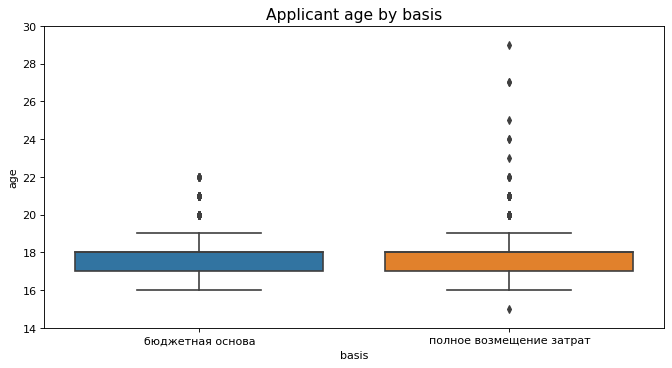

In [166]:
plt.figure(figsize=(10,5), dpi= 80)
sns.boxplot(x='basis', y='age', data=enrolled_applicants, notch=False)

plt.title('Applicant age by basis', fontsize=14)
plt.ylim(14, 30)
plt.show()

Как видно из диаграммы, возраст абитуриентов, зачисленных в вуз на бюджет и контракт, статистически идентичен. Единственное, на полное возмещение затрат зачислено больше более возрастных человек, отмечаемых на диаграмме как выбросы

Сравним категории по полу

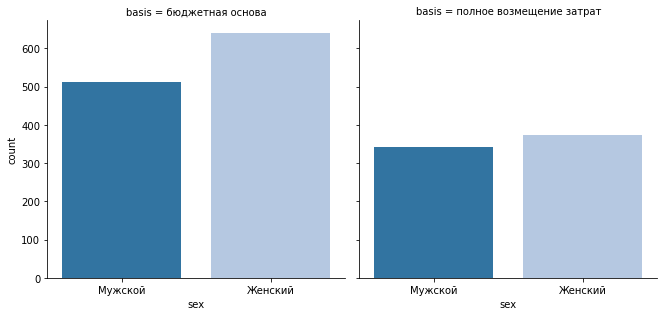

In [167]:
g = sns.catplot("sex", col="basis", col_wrap=4,
                data=enrolled_applicants,
                kind="count", height=4.5,
                palette='tab20')

plt.show()

В обеих категориях абитуриентов женского пола больше. Интересная зависимость, учитывая специфику вуза - строительство и архитектура

In [168]:
budget_enrolled.groupby('sex').count()['applicant_id']

sex
Женский    641
Мужской    512
Name: applicant_id, dtype: int64

In [169]:
641/(641+512)*100, 512/(641+512)*100

(55.59410234171725, 44.40589765828274)

In [170]:
contract_enrolled.groupby('sex').count()['applicant_id']

sex
Женский    373
Мужской    341
Name: applicant_id, dtype: int64

In [171]:
373/(373+341)*100, 341/(373+341)*100

(52.240896358543424, 47.75910364145658)

Посмотрим на их базовое образование

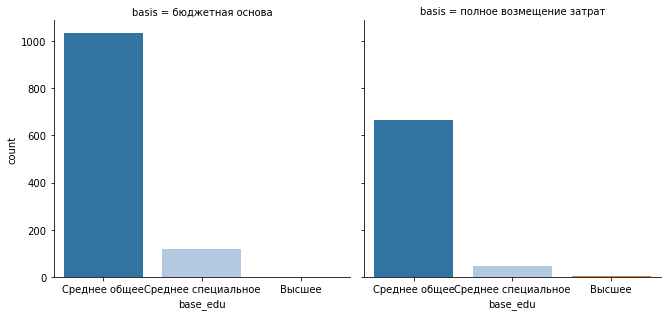

In [172]:
g = sns.catplot("base_edu", col="basis", col_wrap=4,
                data=enrolled_applicants,
                kind="count", height=4.5,
                palette='tab20')

plt.show()

Посмотрим распределение по факультетам

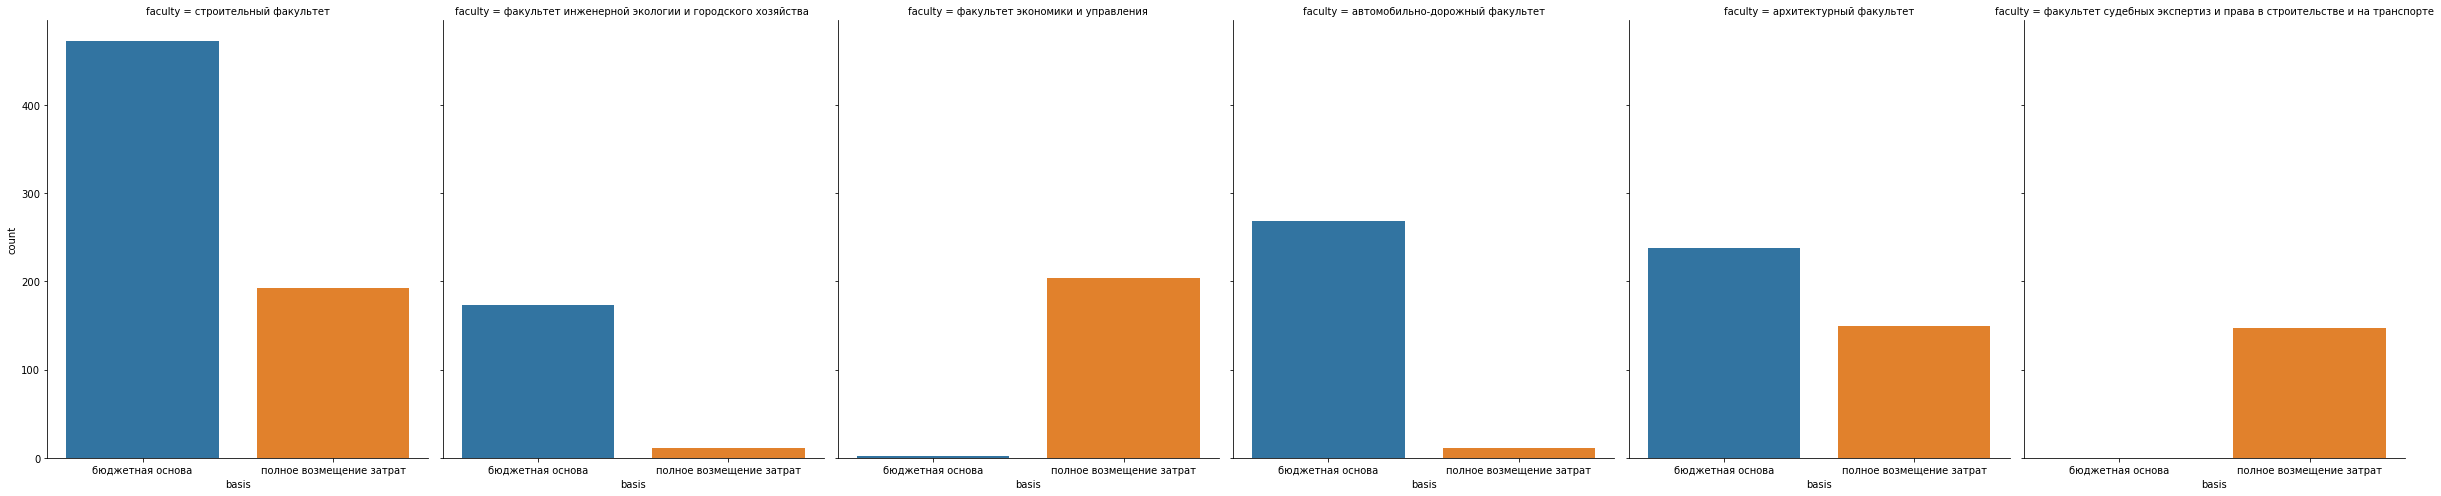

In [173]:
g = sns.catplot("basis", col="faculty", col_wrap=6,
                data=enrolled_applicants,
                kind="count", height=7, aspect=.8)

plt.show();

Строительный, инженерной экологии и городского хозяйства, автомобильно-дорожный и архитектурный факультеты представлены в основном бюджетными местами, тогда как факультеты экономики и управления и судебных экспертиз и права в строительстве и на транспорте - контрактными. Причем факультет судебных экспертиз и права в строительстве и на транспорте бюджетных мест не содержит совсем.

Возможно, экономика и судебные экспертизы не являются профильными для данного вуза, а носят только коммерческий характер, так как эти специальности пользуются популярностью

#### Построим распределение по специальностям

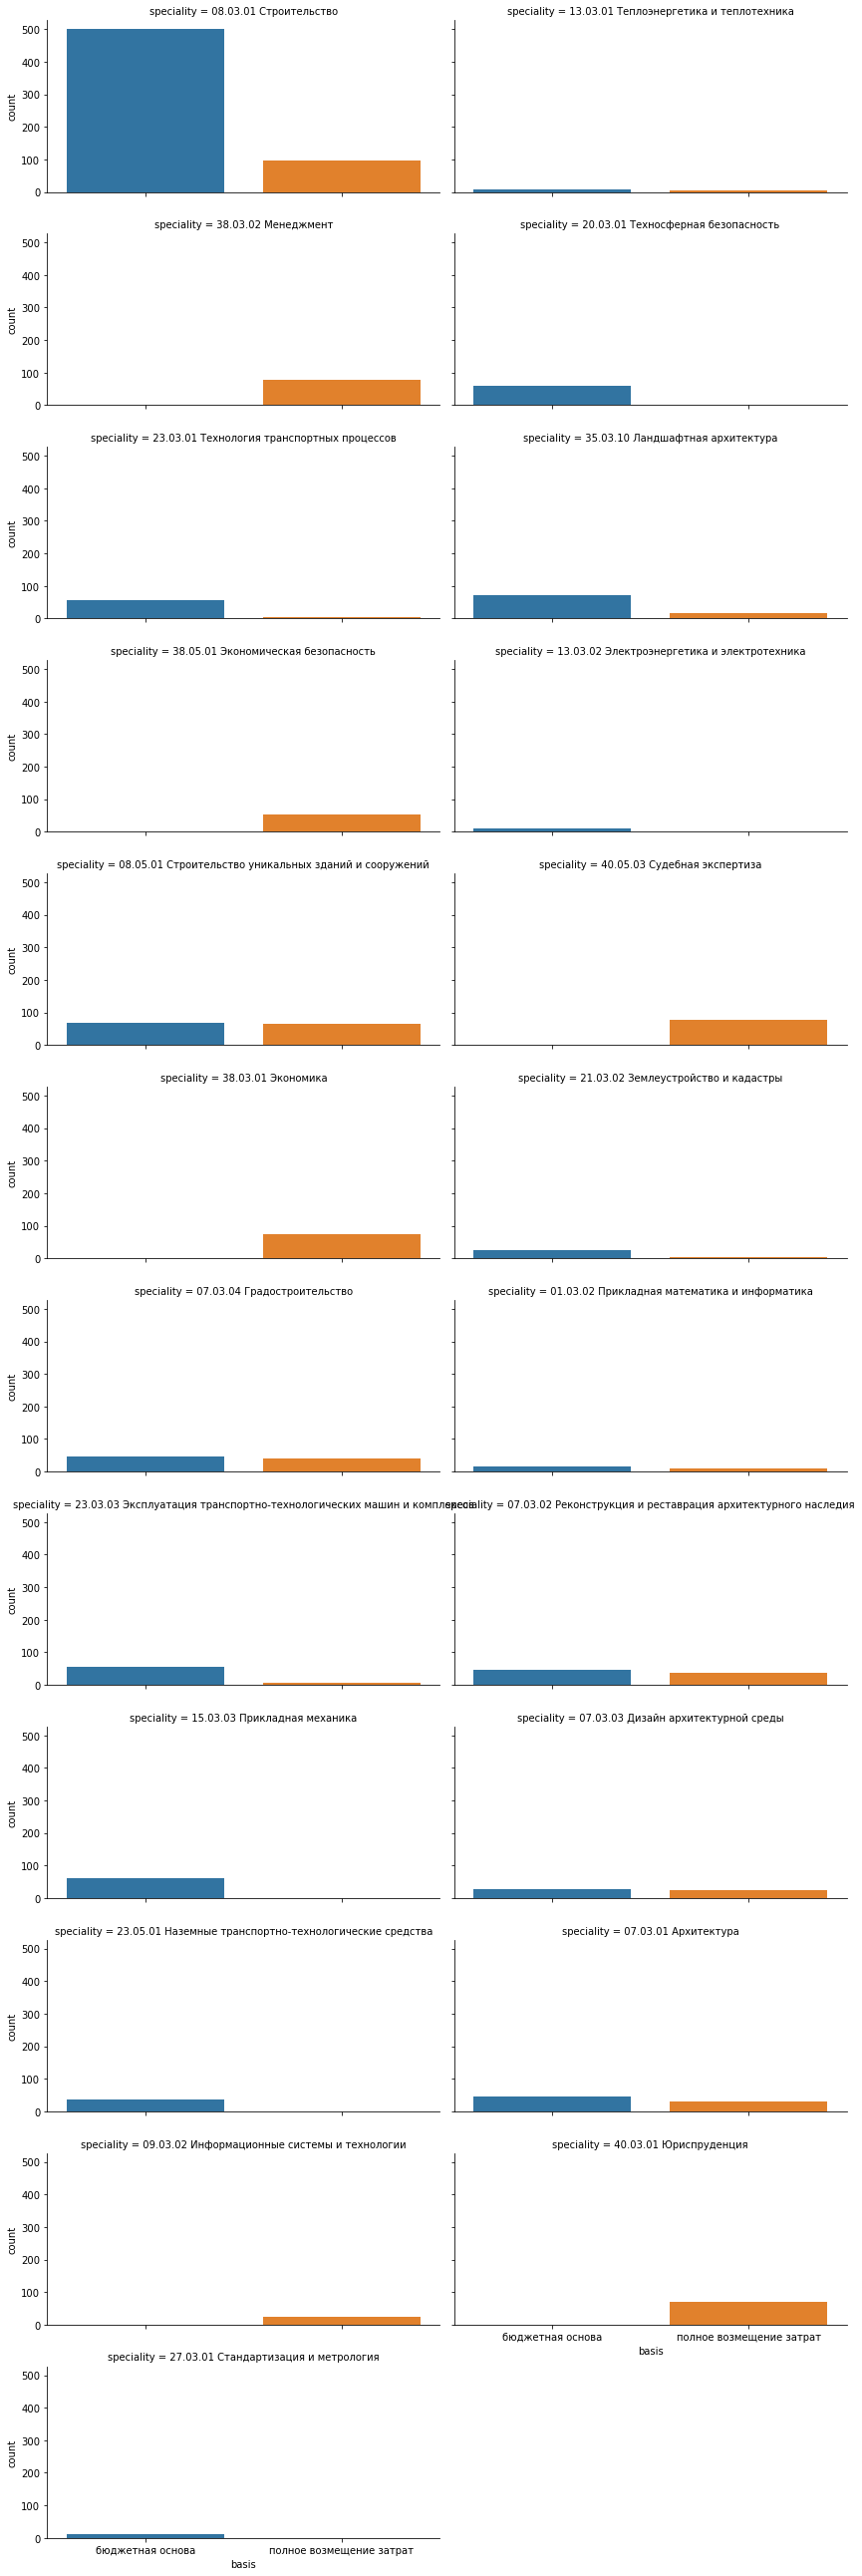

In [174]:
g = sns.catplot("basis", col="speciality", col_wrap=2,
                data=enrolled_applicants,
                kind="count", height=3, aspect=2)

plt.show();

Основное направление подготовки **на бюджете**: 08.03.01 Строительство, **на контракте**: 08.03.01 Строительство, 38.03.02 Менеджмент, 38.03.01 Экономика

#### Далее выясним основные направления, на которые зачисленные студенты подавали заявления чаще всего

Создадим списки студентов, зачисленных на бюджет и контракт

In [175]:
list_of_enrolled_budget = enrolled_applicants.applicant_id[enrolled_applicants.basis == 'бюджетная основа']
list_of_enrolled_budget

3       001-307 40
4       001-659 52
5       001-986 33
7            00196
13           00270
           ...    
5322         99692
5323    997-161 03
5324         99761
5330         99881
5333         99939
Name: applicant_id, Length: 1153, dtype: object

In [176]:
list_of_enrolled_contract = enrolled_applicants.applicant_id[enrolled_applicants.basis == 'полное возмещение затрат']
list_of_enrolled_contract

18      003-449 61
37           00589
43      006-530 70
56           00915
60      010-595 00
           ...    
5297    992-038 48
5306    994-118 20
5308    994-231 39
5326         99790
5329         99879
Name: applicant_id, Length: 714, dtype: object

Рассчитаем количество поданных заявлений по направлениям подготовки для каждой категории

In [177]:
list_of_spec_budget = data[data.applicant_id.isin(list_of_enrolled_budget)]['speciality'].value_counts().reset_index().rename(columns= {'index': 'speciality', 'speciality': 'amount_budget'})
list_of_spec_budget

,speciality,amount_budget
0,08.03.01 Строительство,1700
1,08.05.01 Строительство уникальных зданий и соо...,576
2,23.03.01 Технология транспортных процессов,456
3,35.03.10 Ландшафтная архитектура,437
4,20.03.01 Техносферная безопасность,430
5,21.03.02 Землеустройство и кадастры,397
6,15.03.03 Прикладная механика,392
7,23.03.03 Эксплуатация транспортно-технологичес...,386
8,07.03.03 Дизайн архитектурной среды,360
9,07.03.01 Архитектура,360


In [178]:
list_of_spec_contract = data[data.applicant_id.isin(list_of_enrolled_contract)]['speciality'].value_counts().reset_index().rename(columns= {'index': 'speciality', 'speciality': 'amount_contract'})
list_of_spec_contract

,speciality,amount_contract
0,08.03.01 Строительство,368
1,07.03.01 Архитектура,308
2,07.03.04 Градостроительство,290
3,07.03.03 Дизайн архитектурной среды,274
4,07.03.02 Реконструкция и реставрация архитекту...,264
5,38.03.02 Менеджмент,223
6,38.03.01 Экономика,212
7,08.05.01 Строительство уникальных зданий и соо...,181
8,35.03.10 Ландшафтная архитектура,118
9,40.05.03 Судебная экспертиза,111


Выведем диаграмму для визуализации

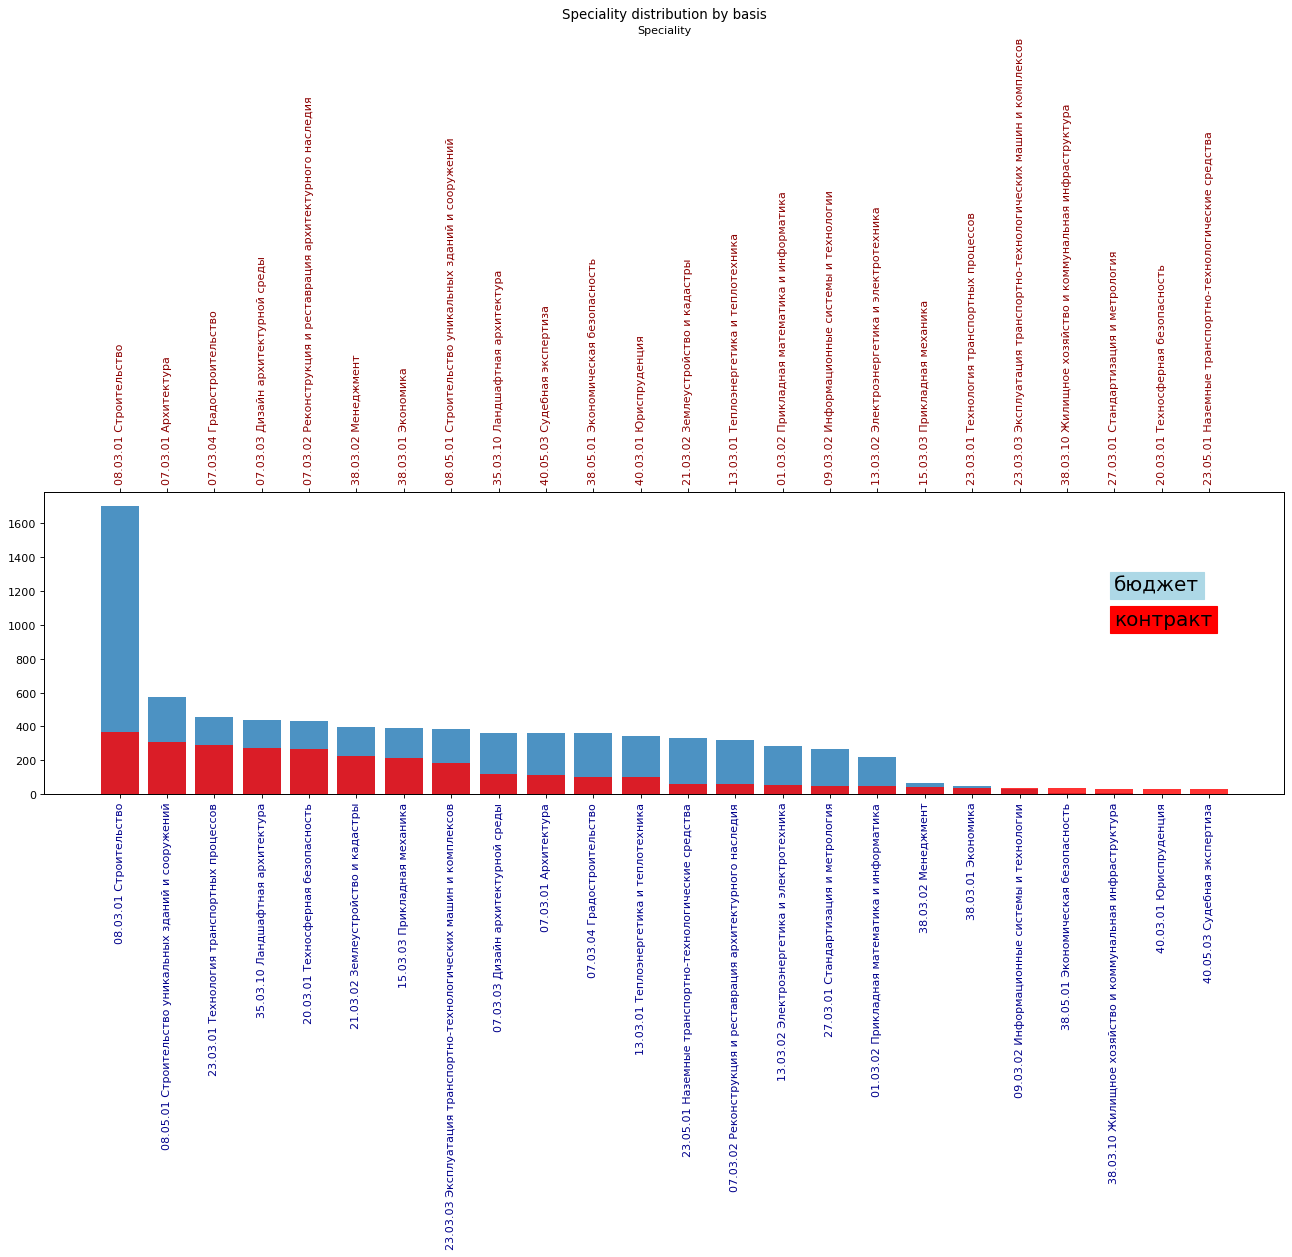

In [179]:
fig = plt.figure(figsize=(20,5), dpi= 80)

ax = fig.add_subplot()

ax.bar(list_of_spec_budget['speciality'], list_of_spec_budget['amount_budget'], alpha= .8)

xax = ax.xaxis
xlabels = xax.get_ticklabels()
for label in xlabels:
    label.set_rotation(90)
    label.set_color('darkblue')
# plt.ylim(0,100)
    

ax1 = ax.twiny()

ax1.bar(list_of_spec_contract['speciality'], list_of_spec_contract['amount_contract'], color= 'red', alpha= .8)

xax1 = ax1.xaxis
xlabels1 = xax1.get_ticklabels()
for label in xlabels1:
    label.set_rotation(90)
    label.set_color('darkred')
# plt.ylim(0,100)

plt.text(21, 1200, 'бюджет', fontsize=18, bbox=dict(edgecolor='w', color='lightblue'), rotation=0)
plt.text(21, 1000, 'контракт', fontsize=18, bbox=dict(edgecolor='w', color='red'), rotation=0)

plt.title('Speciality distribution by basis')
plt.ylabel('Number of applications')
plt.xlabel('Speciality')
plt.show();

**Бюджетники** подавали заявления чаще всего на:
* 08.03.01 Строительство,
* 08.05.01 Строительство уникальных зданий и сооружений,
* 23.03.01 Технология транспортных процессов	

**Контрактники** подавали заявления чаще всего на:
* 08.03.01 Строительство
* 07.03.01 Архитектура
* 07.03.04 Градостроительство

#### Посмотрим распределение по регионам

Определим количество зачисленных студентов в каждом регионе

In [180]:
region_budget = enrolled_applicants[enrolled_applicants['basis'] == 'бюджетная основа']['home_region'].value_counts().reset_index().rename(columns= {'index': 'home_region', 'home_region': 'amount_budget'})
region_budget

,home_region,amount_budget
0,Санкт-Петербург,455
1,Ленинградская обл,87
2,Краснодарский край,39
3,Архангельская обл,34
4,Вологодская обл,22
...,...,...
75,Чукотский АО,1
76,Камчатский край,1
77,Алтайский край,1
78,Туркмения,1


In [181]:
region_contract = enrolled_applicants[enrolled_applicants['basis'] == 'полное возмещение затрат']['home_region'].value_counts().reset_index().rename(columns= {'index': 'home_region', 'home_region': 'amount_contract'})
region_contract

,home_region,amount_contract
0,Санкт-Петербург,318
1,Ленинградская обл,64
2,Краснодарский край,23
3,Мурманская обл,19
4,Ханты-Мансийский АО - Югра АО,13
...,...,...
75,Липецкая обл,1
76,Северная Осетия - Алания Респ,1
77,Хакасия Респ,1
78,Турция,1


Отобразим данные на диаграмме

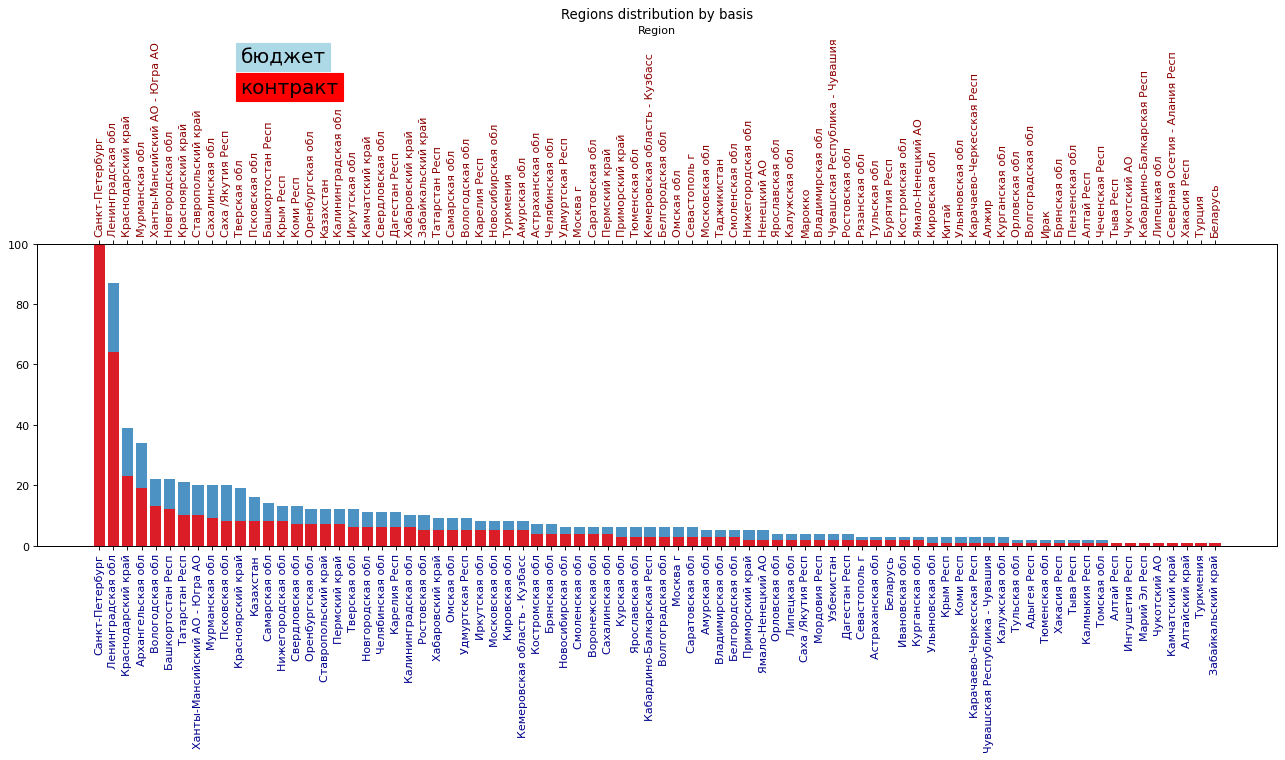

In [182]:
fig = plt.figure(figsize=(20,5), dpi= 80)

ax = fig.add_subplot()

ax.bar(region_budget['home_region'], region_budget['amount_budget'], alpha= .8)

xax = ax.xaxis
xlabels = xax.get_ticklabels()
for label in xlabels:
    label.set_rotation(90)
    label.set_color('darkblue')
plt.ylim(0,100)
    

ax1 = ax.twiny()

ax1.bar(region_contract['home_region'], region_contract['amount_contract'], color= 'red', alpha= .8)

xax1 = ax1.xaxis
xlabels1 = xax1.get_ticklabels()
for label in xlabels1:
    label.set_rotation(90)
    label.set_color('darkred')
plt.ylim(0,100)

plt.text(10, 160, 'бюджет', fontsize=18, bbox=dict(edgecolor='w', color='lightblue'), rotation=0)
plt.text(10, 150, 'контракт', fontsize=18, bbox=dict(edgecolor='w', color='red'), rotation=0)

plt.title('Regions distribution by basis')
plt.ylabel('Number of applications')
plt.xlabel('Region')
plt.show();

Первые три региона совпадают: **Санкт-Петербург, Ленинградская обл, Краснодарский край**

#### Посмотрим количество поданных заявлений на бюджет и контракт

Создадим выборку по количеству заявлений на бюджет и контракт

In [183]:
nums_of_apps_based = enrolled_applicants[['basis', 'nums_of_apps']].groupby(by= enrolled_applicants['basis']).sum()
nums_of_apps_based = nums_of_apps_based.reset_index()
nums_of_apps_based

,basis,nums_of_apps
0,бюджетная основа,7780
1,полное возмещение затрат,3064


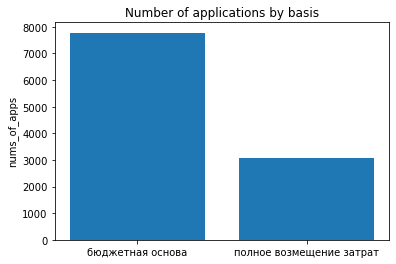

In [184]:
xs = [i + 0.1 for i, _ in enumerate(nums_of_apps_based['basis'])]

plt.bar(xs, nums_of_apps_based['nums_of_apps'], align='edge')

plt.ylabel("nums_of_apps")
plt.title("Number of applications by basis")

plt.xticks([i + 0.5 for i, _ in enumerate(nums_of_apps_based['basis'])], nums_of_apps_based['basis'])

plt.show()

Заявлений, поданных абитуриентами, зачисленными на бюджет, больше более, чем в 2 раза. Посмотрим среднее количество заявлений на одного абитуриента, которые они подачи в период приемной кампании

In [185]:
nums_of_apps_based_aver = enrolled_applicants[['basis', 'nums_of_apps']].groupby(by= enrolled_applicants['basis']).mean()
nums_of_apps_based_aver = nums_of_apps_based_aver.reset_index()
nums_of_apps_based_aver

,basis,nums_of_apps
0,бюджетная основа,6.747615
1,полное возмещение затрат,4.291317


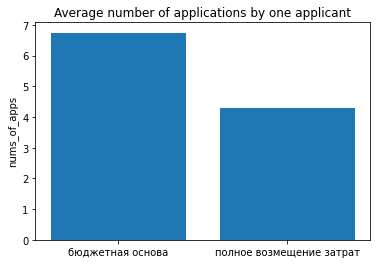

In [186]:
xs = [i + 0.1 for i, _ in enumerate(nums_of_apps_based_aver['basis'])]

plt.bar(xs, nums_of_apps_based_aver['nums_of_apps'], align='edge')

plt.ylabel("nums_of_apps")
plt.title("Average number of applications by one applicant")

plt.xticks([i + 0.5 for i, _ in enumerate(nums_of_apps_based_aver['basis'])], nums_of_apps_based_aver['basis'])

plt.show()

Зачисленные на бюджет абитуриенты подавали в среднем 6.7 заявлений, тогда как зачисленные на контракт - 4.3 заявления

#### Посмотрим средний балл вступительных испытаний

In [187]:
score_aver = enrolled_applicants[['basis', 'score']].groupby(by= enrolled_applicants['basis']).mean()
score_aver = score_aver.reset_index()
score_aver

,basis,score
0,бюджетная основа,243.352125
1,полное возмещение затрат,207.582633


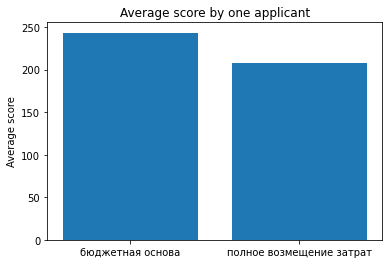

In [188]:
xs = [i + 0.1 for i, _ in enumerate(score_aver['basis'])]

plt.bar(xs, score_aver['score'], align='edge')

plt.ylabel("Average score")
plt.title("Average score by one applicant")

plt.xticks([i + 0.5 for i, _ in enumerate(score_aver['score'])], score_aver['basis'])

plt.show()

На бюджет зачислены абитуриенты, у которых средний балл выше почти на 20%: 243 против 207 у зачисленных на контракт

#### Посмотрим на соотношение социальных категорий зачисленных студентов. Абитуриенты с социальными льготами должны быть только на бюджете 

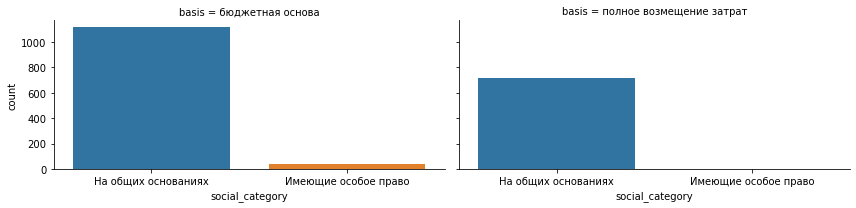

In [189]:
g = sns.catplot("social_category", col="basis", col_wrap=2,
                data=enrolled_applicants,
                kind="count", height=3, aspect=2)

plt.show();

Диаграммы подтверждают, что льготы предоставляются только для бюджета

#### Сравним способы подачи заявления на бюджет и по контракту

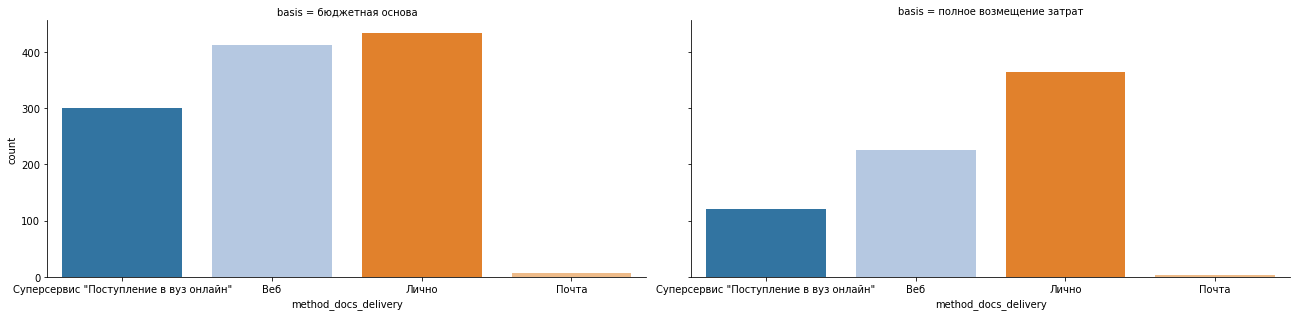

In [190]:
g = sns.catplot("method_docs_delivery", col="basis", col_wrap=4,
                data=enrolled_applicants,
                kind="count", height=4.5, aspect=2,
                palette='tab20')

plt.show()

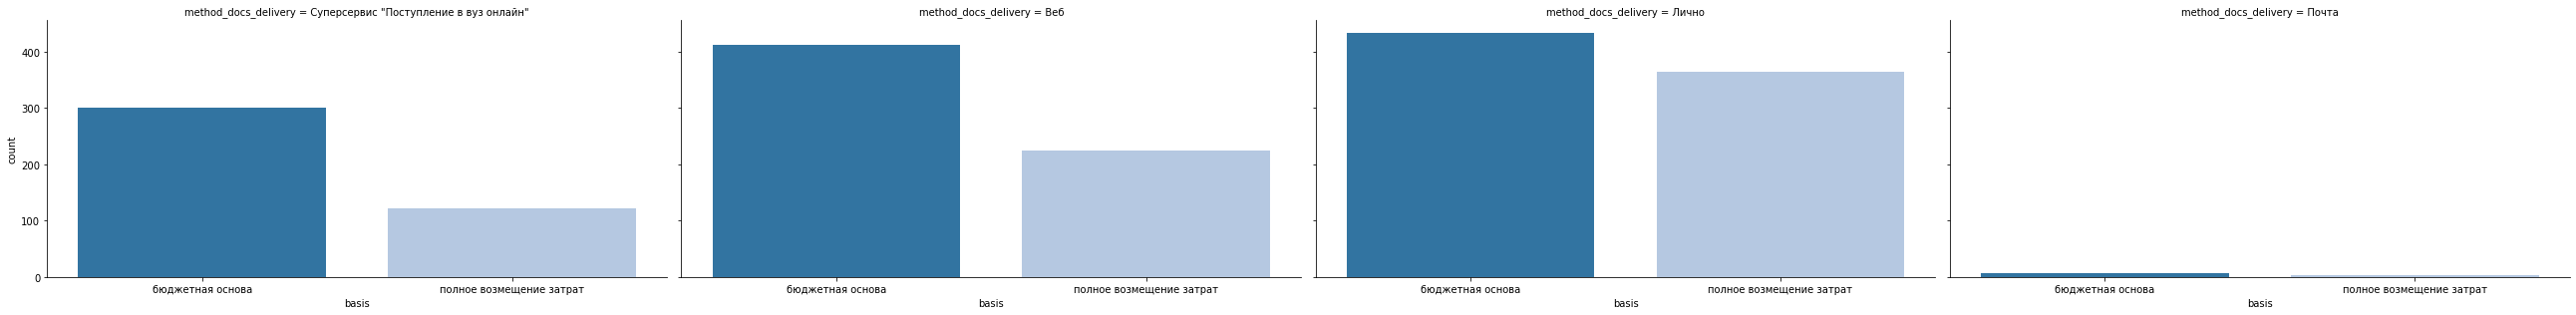

In [191]:
g = sns.catplot("basis", col="method_docs_delivery", col_wrap=4,
                data=enrolled_applicants,
                kind="count", height=4.5, aspect=2,
                palette='tab20')

plt.show()

Соотношение по каждому способу примерно 1/2 в пользу бюджета (но их и больше в абсолютном выражении). Для оценки посмотрим относительное распределение

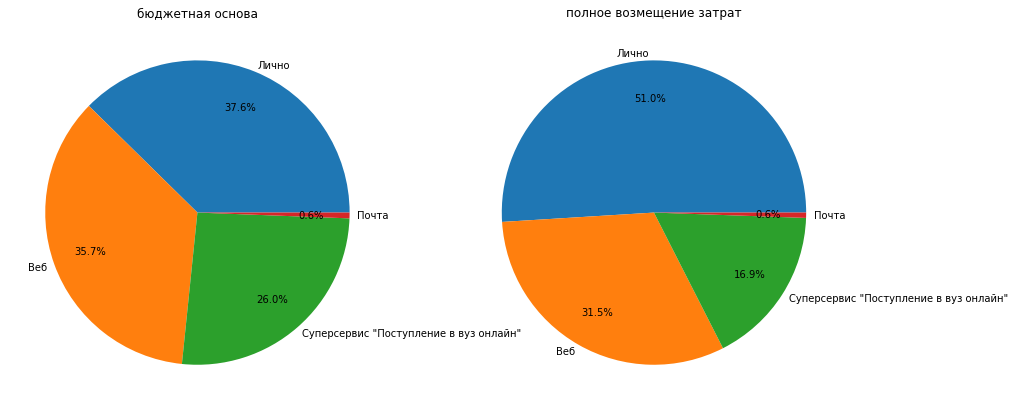

In [192]:
pie1 = enrolled_applicants[enrolled_applicants['basis'] == 'бюджетная основа']['applicant_id'].groupby(by= enrolled_applicants['method_docs_delivery']).count().sort_values(ascending= False)
pie2 = enrolled_applicants[enrolled_applicants['basis'] == 'полное возмещение затрат']['applicant_id'].groupby(by= enrolled_applicants['method_docs_delivery']).count().sort_values(ascending= False)
plt.figure(figsize=(15, 15))

plt.subplot (1, 2, 1)
plt.pie(pie1,
        autopct='%.1f%%',
        labels= pie1.index,
        pctdistance= .75,
        labeldistance= 1.05,
        rotatelabels= False)
plt.title ('бюджетная основа')

plt.subplot (1, 2, 2)
plt.pie(pie2,
        autopct='%.1f%%',
        labels= pie2.index,
        pctdistance= .75,
        labeldistance= 1.05,
        rotatelabels= False)
plt.title ('полное возмещение затрат')

plt.show()

Значительное различие между бюджетниками и контрактниками наблюдается при подаче заявлений лично и через cуперсервис "Поступление в вуз онлайн"

In [193]:
bud = enrolled_applicants[enrolled_applicants['basis'] == 'бюджетная основа']['method_docs_delivery'].value_counts(normalize=True).reset_index().rename(columns= {'method_docs_delivery': 'бюджетная основа'})
con = enrolled_applicants[enrolled_applicants['basis'] == 'полное возмещение затрат']['method_docs_delivery'].value_counts(normalize=True).reset_index().rename(columns= {'method_docs_delivery': 'полное возмещение затрат'})
pie2.reset_index().rename(columns= {'applicant_id': 'полное возмещение затрат'})
table1 = bud.merge(right= con, right_on= 'index', left_on= 'index').rename(columns= {'index': 'method_docs_delivery'}).set_index('method_docs_delivery')
table1

,бюджетная основа,полное возмещение затрат
method_docs_delivery,,
Лично,0.376409,0.509804
Веб,0.357329,0.315126
"Суперсервис ""Поступление в вуз онлайн""",0.260191,0.169468
Почта,0.006071,0.005602


Если объединить способы подачи `Веб` и `Суперсервис "Поступление в вуз онлайн"`, то большинство бюджетников подали заявление через Интернет. У контрактников примерно поровну, с небольшим перевесом в сторону личной подачи

Рассчитаем количество поданных заявлений по способам подачи для каждой категории (в том числе, подано, отозвано и т.д.)

In [194]:
list_of_meth_budget = data[data.applicant_id.isin(list_of_enrolled_budget)]['method_docs_delivery'].value_counts().reset_index().rename(columns= {'index': 'method_docs_delivery', 'method_docs_delivery': 'amount_budget'})
list_of_meth_budget

,method_docs_delivery,amount_budget
0,Лично,3157
1,Веб,2301
2,"Суперсервис ""Поступление в вуз онлайн""",2270
3,Почта,52


In [195]:
list_of_meth_contract = data[data.applicant_id.isin(list_of_enrolled_contract)]['method_docs_delivery'].value_counts().reset_index().rename(columns= {'index': 'method_docs_delivery', 'method_docs_delivery': 'amount_contract'})
list_of_meth_contract

,method_docs_delivery,amount_contract
0,Лично,1546
1,Веб,899
2,"Суперсервис ""Поступление в вуз онлайн""",592
3,Почта,27


Выведем диаграмму для визуализации

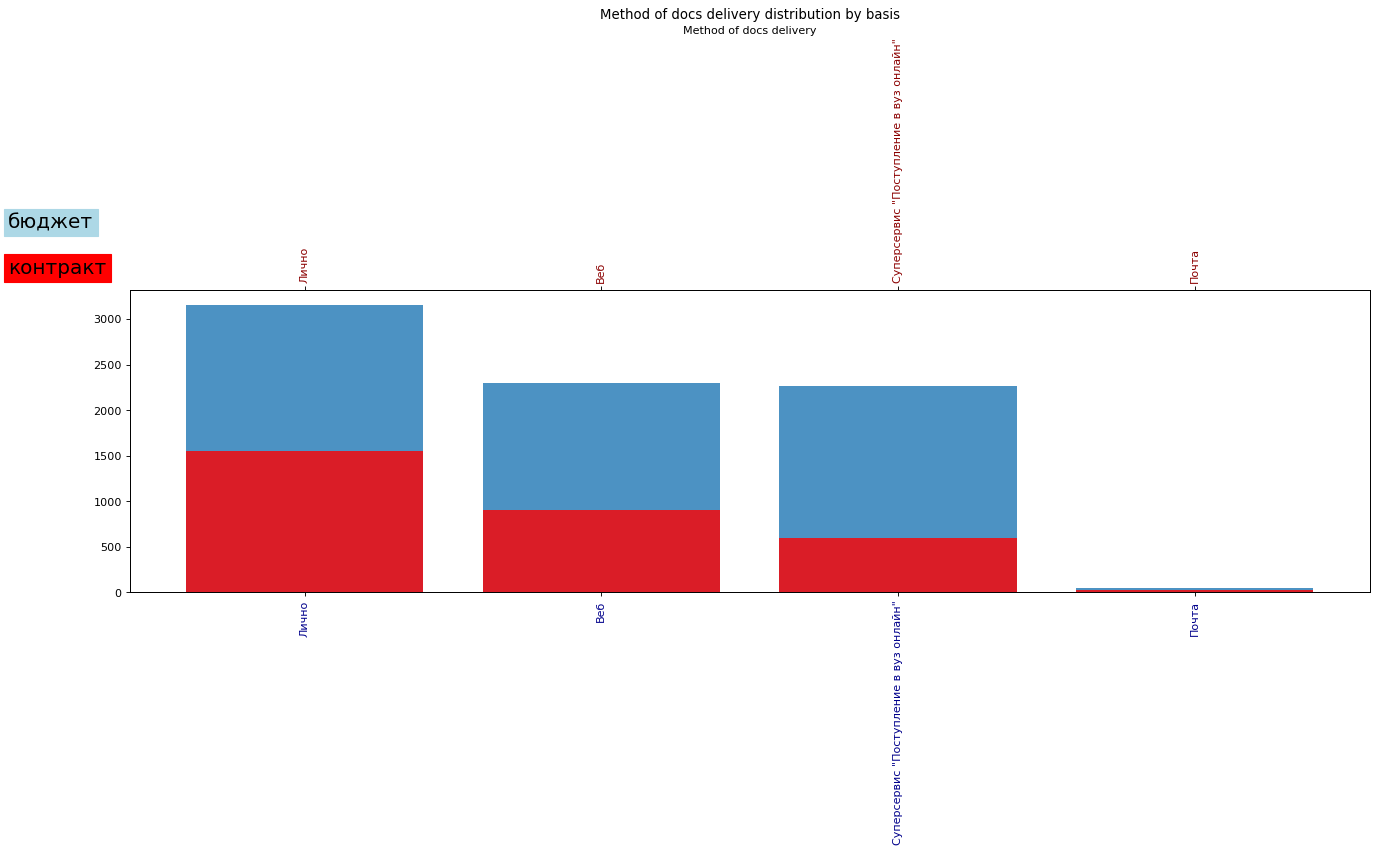

In [196]:
fig = plt.figure(figsize=(20,5), dpi= 80)

ax = fig.add_subplot()

ax.bar(list_of_meth_budget['method_docs_delivery'], list_of_meth_budget['amount_budget'], alpha= .8)

xax = ax.xaxis
xlabels = xax.get_ticklabels()
for label in xlabels:
    label.set_rotation(90)
    label.set_color('darkblue')
# plt.ylim(0,100)
    

ax1 = ax.twiny()

ax1.bar(list_of_meth_contract['method_docs_delivery'], list_of_meth_contract['amount_contract'], color= 'red', alpha= .8)

xax1 = ax1.xaxis
xlabels1 = xax1.get_ticklabels()
for label in xlabels1:
    label.set_rotation(90)
    label.set_color('darkred')
# plt.ylim(0,100)

plt.text(-1, 4000, 'бюджет', fontsize=18, bbox=dict(edgecolor='w', color='lightblue'), rotation=0)
plt.text(-1, 3500, 'контракт', fontsize=18, bbox=dict(edgecolor='w', color='red'), rotation=0)

plt.title('Method of docs delivery distribution by basis')
plt.ylabel('Number of applications')
plt.xlabel('Method of docs delivery')
plt.show();

Здесь мы видим, что чаще документы подавались лично. Но при объединении способов "Веб" и "Суперсервис" в один способ подачи "Удаленно через интернет" увидим, что метод удаленной подачи документов преобладает

#### Посмотрим распределение по уровню подготовки (бакалавр, специалист)

In [197]:
grade_budget = enrolled_applicants[enrolled_applicants['basis'] == 'бюджетная основа']['grade'].value_counts().reset_index().rename(columns= {'index': 'grade', 'grade': 'amount_budget'})
grade_budget

,grade,amount_budget
0,Бакалавр,1048
1,Специалист,105


In [198]:
grade_contract = enrolled_applicants[enrolled_applicants['basis'] == 'полное возмещение затрат']['grade'].value_counts().reset_index().rename(columns= {'index': 'grade', 'grade': 'amount_contract'})
grade_contract

,grade,amount_contract
0,Бакалавр,519
1,Специалист,195


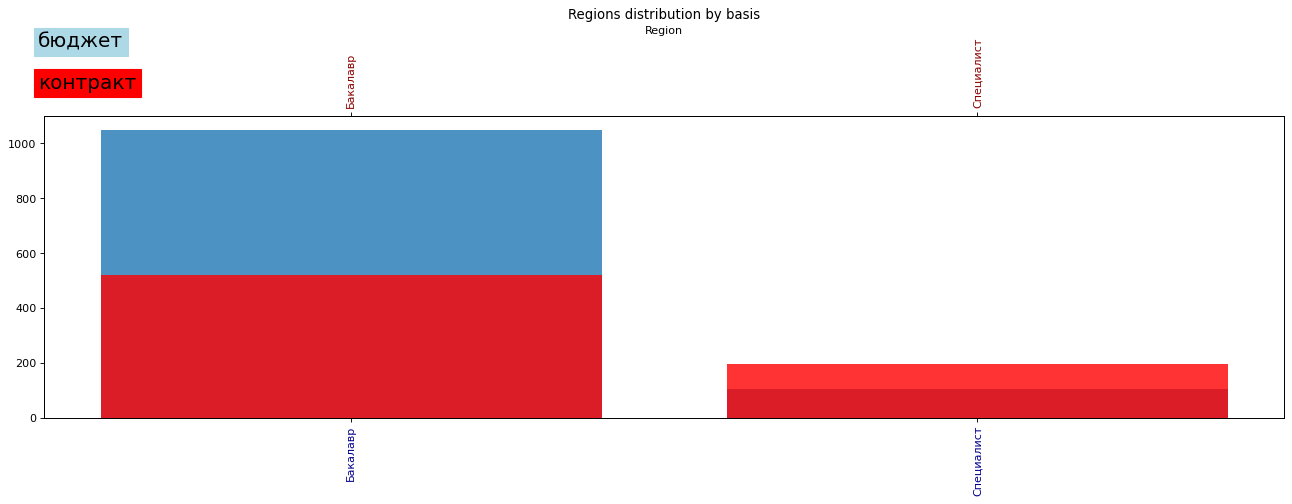

In [199]:
fig = plt.figure(figsize=(20,5), dpi= 80)

ax = fig.add_subplot()

bar1 = ax.bar(grade_budget['grade'], grade_budget['amount_budget'], alpha= .8)

xax = ax.xaxis
xlabels = xax.get_ticklabels()
for label in xlabels:
    label.set_rotation(90)
    label.set_color('darkblue')
# plt.ylim(0,100)
    

ax1 = ax.twiny()

bar2 = ax1.bar(grade_contract['grade'], grade_contract['amount_contract'], color= 'red', alpha= .8)

xax1 = ax1.xaxis
xlabels1 = xax1.get_ticklabels()
for label in xlabels1:
    label.set_rotation(90)
    label.set_color('darkred')
# plt.ylim(0,100)

plt.text(-0.5, 1350, 'бюджет', fontsize=18, bbox=dict(edgecolor='w', color='lightblue'), rotation=0)
plt.text(-0.5, 1200, 'контракт', fontsize=18, bbox=dict(edgecolor='w', color='red'), rotation=0)

plt.title('Regions distribution by basis')
plt.ylabel('Number of applications')
plt.xlabel('Region')

plt.show();

## Выводы части 2

Составлены портреты абитуриентов двух категорий:

1. Зачисленный на бюджет абитуриент
2. Зачисленный на контракт абитуриент

Состав портрета:
* пол,
* возраст,
* где учился,
* где живет (Санкт-Петербург или регионы, может какой-то регион в среднем более активен),
* какие направления подготовки выбирал (т.е. самые популярные направления подготовки),
* сколько подал заявлений, каким способом,
* какие у него баллы вступительных испытаний.

|Характеристика|Зачисленный на бюджет абитуриент|Зачисленный на контракт абитуриент|
|-|-|-|
|**пол**|женский|женский|
|**средний возраст**|18|18|
|**образование**|среднее общее|среднее общее|
|**проживание**|Санкт-Петербург, Ленинградская обл, Краснодарский край|Санкт-Петербург, Ленинградская обл, Краснодарский край|
|**направление подготовки, на которое чаще зачислены**|08.03.01 Строительство|08.03.01 Строительство, 38.03.01 Экономика, 38.03.02 Менеджмент|
|**направление подготовки, на которое чаще подавали**|08.03.01 Строительство, 08.05.01 Строительство уникальных зданий и сооружений, 23.03.01 Технология транспортных процессов|08.03.01 Строительство, 07.03.01 Архитектура, 07.03.04 Градостроительство|
|**уровень подготовки**|бакалавр|бакалавр|
|**количество заявлений**|6.7|4.3|
|**способ подачи заявлений**|лично или веб|лично|
|**вступительные баллы**|243|207|

## Выводы по всей работе

**Определены параметры приемной кампании 2022 года по следующим критериям:**

1. Дата начала и окончания приема документов
1. Общее количество заявлений, количество заявлений по факультетам и направлениям подготовки
1. Количество уникальных абитуриентов
1. Количество заявлений на одного абитуриента, среднее, медиана (используйте результаты метода describe())
1. Распределение по способам подачи документов
1. Распределение по основаниям поступления, уровням подготовки, образованию
1. Распределение по регионам, гражданству
1. Количество согласий по направлениям подготовки до момента публикации конкурсных списков

**Составлены портреты абитуриентов двух категорий:**

1. Зачисленный на бюджет абитуриент
2. Зачисленный на контракт абитуриент

В целом ожидаемо абитуриенты возрастом 18 лет и проживающие в Санкт-Петербурге и Ленобласти преобладают как среди зачисленных, так и среди всех подававщих заявления. На третьем месте по региону проживания следует Краснодарский край. Вероятно из-за специфики вуза (строительное направление) и потребностью в специалистах на юге России - в Краснодарском крае и республике Крым.

Образование зачисленных на бюджет и контракт в большинстве своем среднее общее. Ничего специфического не обнаруживается.

На бюджет принимались абитуриенты со средним вступительным баллом примерно на 20% выше, чем у зачисленных на контракт.

Наиболее популярный уровень подготовки - бакалавр. Вероятно, это связано с тем, что учиться нужно всего 4 года для получения хороших знаний по выбранной специальности.

Самая популярная специальность как на бюджете, так и на контракте - 08.03.01 Строительство. В то же время на контракте популярны 38.03.01 Экономика и 38.03.02 Менеджмент